# PARTIE A

In [ ]:
#! pip install yfinance

In [ ]:
import yfinance as yf

### Imports

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp        #faire de la statistique decisionnelle
import statsmodels as stm  #series temporelles (ARIMA, SMOOTHING)
from statsmodels.tsa.seasonal import seasonal_decompose
#import neuralprophet (facebook), tensorflow (google)

In [ ]:
#! pip install pandas_market_calendars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
#! pip install workalendar

In [ ]:
# Handling dates
import pandas_market_calendars as mcal
from workalendar.usa import UnitedStates
from datetime import date

In [ ]:
#! pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from warnings import filterwarnings

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import pmdarima as pm

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
#! pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5

In [ ]:
#! pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet

## Manipulation de données

### Téléchargement de la base de données

In [ ]:
data = yf.download("TSLA MCHP", start="2019-01-01", end="2024-01-20", group_by = 'tickers')
data

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

[                       0%%                      ]WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

[*********************100%%**********************]  2 of 2 completed


Ticker            TSLA                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2019-01-02   20.406668   21.008667   19.920000   20.674667   20.674667   
2019-01-03   20.466667   20.626667   19.825333   20.024000   20.024000   
2019-01-04   20.400000   21.200001   20.181999   21.179333   21.179333   
2019-01-07   21.448000   22.449333   21.183332   22.330667   22.330667   
2019-01-08   22.797333   22.934000   21.801332   22.356667   22.356667   
...                ...         ...         ...         ...         ...   
2024-01-12  220.080002  225.339996  217.149994  218.889999  218.889999   
2024-01-16  215.100006  223.490005  212.179993  219.910004  219.910004   
2024-01-17  214.860001  215.669998  212.009995  215.550003  215.550003   
2024-01-18  216.880005  217.449997  208.740005  211.880005  211.880005   
2024-01-19  209.990005  213.190002  207.559998  212.190002  212.190002   

Ticker                      MCHP                                              \
Price          Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2019-01-02  174879000  35.134998  36.145000  35.000000  35.674999  33.016716   
2019-01-03  104478000  35.025002  35.105000  33.080002  33.160000  30.689116   
2019-01-04  110911500  33.685001  34.680000  33.540001  34.505001  31.933893   
2019-01-07  113268000  34.544998  35.900002  34.355000  35.514999  32.868637   
2019-01-08  105127500  35.904999  36.500000  35.435001  36.480000  33.761726   
...               ...        ...        ...        ...        ...        ...   
2024-01-12  122889000  86.089996  86.349998  84.800003  85.410004  85.410004   
2024-01-16  115355000  85.309998  85.989998  84.360001  85.160004  85.160004   
2024-01-17  103164400  84.000000  84.000000  81.720001  83.339996  83.339996   
2024-01-18  108595400  85.860001  86.559998  85.139999  86.160004  86.160004   
2024-01-19  102095800  87.480003  89.940002  86.639999  89.440002  89.440002   

Ticker               
Price        Volume  
Date                 
2019-01-02  5305000  
2019-01-03  9572200  
2019-01-04  7479400  
2019-01-07  5781000  
2019-01-08  9193600  
...             ...  
2024-01-12  3025700  
2024-01-16  4335000  
2024-01-17  6446500  
2024-01-18  6735600  
2024-01-19  6381300  

[1271 rows x 12 columns]

In [ ]:
data.corr()

Ticker                TSLA                                                    \
Price                 Open      High       Low     Close Adj Close    Volume   
Ticker Price                                                                   
TSLA   Open       1.000000  0.999360  0.999113  0.998164  0.998164 -0.437577   
       High       0.999360  1.000000  0.999126  0.999174  0.999174 -0.430559   
       Low        0.999113  0.999126  1.000000  0.999261  0.999261 -0.444448   
       Close      0.998164  0.999174  0.999261  1.000000  1.000000 -0.436033   
       Adj Close  0.998164  0.999174  0.999261  1.000000  1.000000 -0.436033   
       Volume    -0.437577 -0.430559 -0.444448 -0.436033 -0.436033  1.000000   
MCHP   Open       0.844458  0.842494  0.846354  0.844339  0.844339 -0.365412   
       High       0.848797  0.847348  0.850934  0.849531  0.849531 -0.364403   
       Low        0.839271  0.837607  0.842062  0.840353  0.840353 -0.367963   
       Close      0.842283  0.841069  0.845200  0.844432  0.844432 -0.366207   
       Adj Close  0.837630  0.836380  0.840594  0.839699  0.839699 -0.358847   
       Volume    -0.191838 -0.191118 -0.196353 -0.194589 -0.194589  0.218386   

Ticker                MCHP                                                    
Price                 Open      High       Low     Close Adj Close    Volume  
Ticker Price                                                                  
TSLA   Open       0.844458  0.848797  0.839271  0.842283  0.837630 -0.191838  
       High       0.842494  0.847348  0.837607  0.841069  0.836380 -0.191118  
       Low        0.846354  0.850934  0.842062  0.845200  0.840594 -0.196353  
       Close      0.844339  0.849531  0.840353  0.844432  0.839699 -0.194589  
       Adj Close  0.844339  0.849531  0.840353  0.844432  0.839699 -0.194589  
       Volume    -0.365412 -0.364403 -0.367963 -0.366207 -0.358847  0.218386  
MCHP   Open       1.000000  0.998602  0.998535  0.996490  0.995143 -0.247248  
       High       0.998602  1.000000  0.998453  0.998508  0.997194 -0.232219  
       Low        0.998535  0.998453  1.000000  0.998487  0.997069 -0.258223  
       Close      0.996490  0.998508  0.998487  1.000000  0.998539 -0.244319  
       Adj Close  0.995143  0.997194  0.997069  0.998539  1.000000 -0.233375  
       Volume    -0.247248 -0.232219 -0.258223 -0.244319 -0.233375  1.000000

Je vais ignorer la colonne 'Adj Close' car elle est la même que 'Close'

Je vais ignorer la colonne 'Volume' car elle n'est pas significative étant donné qu'elle n'est connu qu'après la fermeture du marché

In [ ]:
data.shape

(1271, 12)

#### Gestion des valeurs manquantes

Identification des patterns des données manquantes

In [ ]:
import missingno as msno

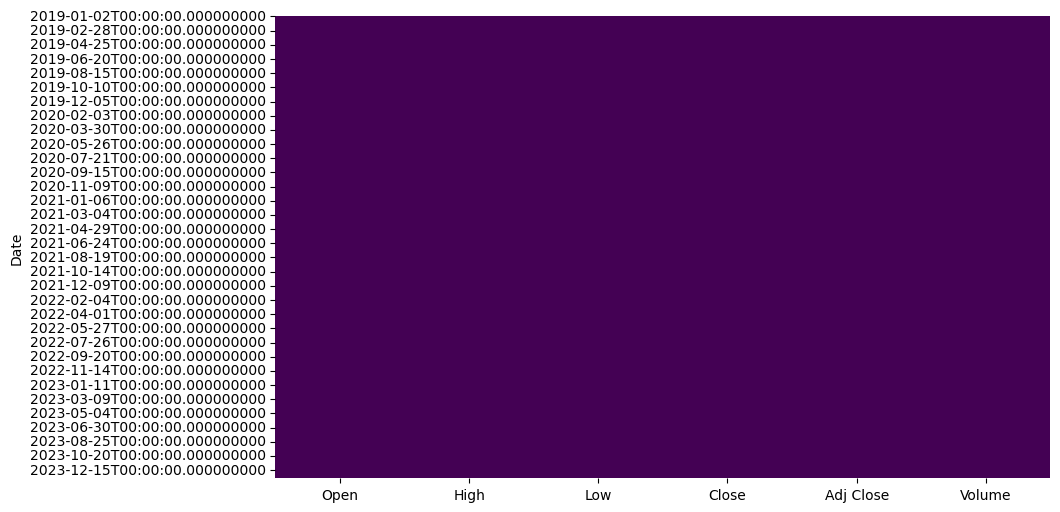

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.TSLA.isna(), cbar = False, cmap = 'viridis')
plt.show()

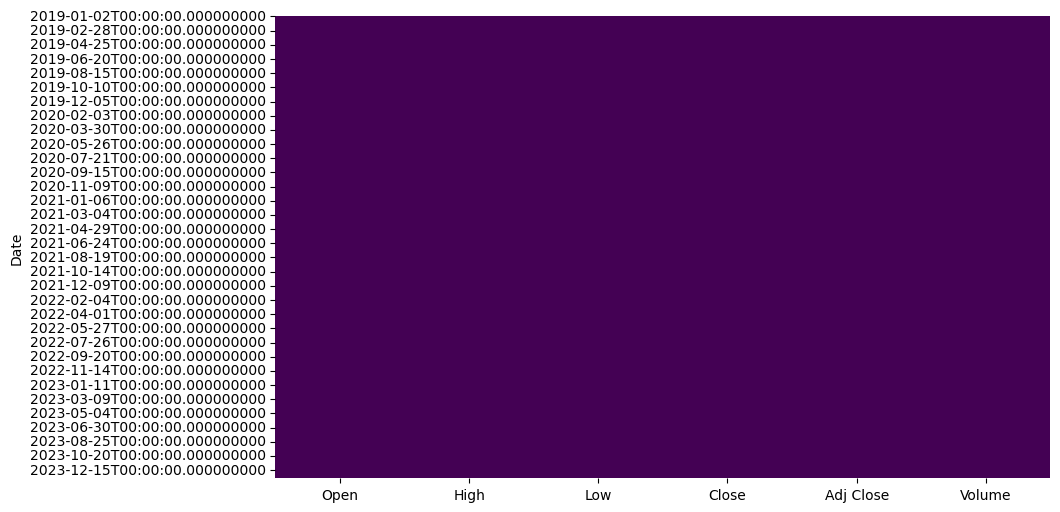

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.MCHP.isna(), cbar = False, cmap = 'viridis')
plt.show()

In [ ]:
def check_holiday_market_open(series):

    # Création des objects
    nyse = mcal.get_calendar('NYSE')
    cal = UnitedStates()

    # Faire une liste de dates
    missing_data_dates = series[series.isna().any(axis=1)].index

    # Vérifier is une date spécifique est un trading day ou un jour férié
    if len(missing_data_dates.tolist()) > 0:

      for i, day in enumerate(missing_data_dates.tolist()):

          str_date = f'{day.date().year}-{day.date().month}-{day.date().day}'

          specific_day = date(day.date().year, day.date().month, day.date().day)
          schedule = nyse.schedule(start_date = str_date, end_date = str_date)

          if len(schedule) == 0:
              print(f'{i} - Au jour : {day}, le marché était fermé, Férié: {cal.is_holiday(specific_day)}')
          else:
              print(f'{i} - Au jour : {day}, le marché était ouvert, Férié: {cal.is_holiday(specific_day)}')
    else:
      print('Aucune donnée manquante')

Vérifier les dates pour TSLA

In [ ]:
check_holiday_market_open(data.TSLA)

Aucune donnée manquante


Vérifier les dates pour MCHP

In [ ]:
check_holiday_market_open(data.MCHP)

Aucune donnée manquante


Il n'ya pas de données manquantes, autrement la fonction affichera le jour en question et si ce jour est un jour férié ou non.

In [ ]:
data.isna().sum()

TSLA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MCHP  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
dtype: int64

#### Données dupliquées

In [ ]:
data.duplicated().sum()

0

#### Données abérrantes

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y = data.TSLA.Close, name = 'TESLA'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y = data.MCHP.Close, name = 'Microchip Tech'))
fig.show()

D'après la figure de la boite à moustache on constate qu'il n'y a pas de données abérrante.

# PARTIE B

## Analysez statistiques des actions de Tesla

In [ ]:
def plot_closings():

    # Create the line plots
    fig = px.line(
        data,
        x = data.index,
        y = [data.TSLA.Close, data.MCHP.Close],
        title = "Closing values of Tesla and Microchip Technology",
        labels = ['Tesla', 'Microchip Tech']
    )

    newnames = {'wide_variable_0':'Tesla', 'wide_variable_1': 'Microchip Tech'}
    fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                        legendgroup = newnames[t.name],
                                        hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                        )
                    )
    # Show the figure
    fig.show()

In [ ]:
def plot_solo_closings(y, label):

    # Create the line plots
    fig = px.line(
        data,
        x = data.index,
        y = [y],
        title = "Closing values of Tesla, Microchip Technology",
        labels = [label]
    )

    newnames = {'wide_variable_0':label}
    fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                        legendgroup = newnames[t.name],
                                        hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                        )
                    )
    # Show the figure
    fig.show()

In [ ]:
def stats_auto(series):

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    dispersion_moyenne = series.std() / series.mean()*100
    dispersion_mediane = IQR / series.median()*100

    print('***************')
    print(series.describe())
    print('***************')
    print(f"Dispersion moyenne: {dispersion_moyenne}\nDispersion mediane: {dispersion_mediane}")


In [ ]:
plot_closings()

In [ ]:
from scipy.stats import shapiro
shapiro(data.TSLA.Close)[1]

4.828597879335183e-26

la serie differenciée de Tesla n'est pas issue du hasard

In [ ]:
shapiro(data.MCHP.Close)[1]

3.188605313855621e-22

la serie differenciée de Microchip n'est pas issue du hasard

detection de cycles

In [ ]:
#! pip install cydets

In [ ]:
from cydets.algorithm import detect_cycles

In [ ]:
def cycles_detection(serie):
    # create sample data
    series = pd.Series(serie)

    # detect cycles
    print(detect_cycles(series).sort_values(by="duration", ascending=False))

In [ ]:
cycles_detection(data.TSLA.Close)

       t_start      t_end  t_minimum       doc  duration
1   2019-01-02 2021-11-04 2019-06-03  0.021966 1037 days
239 2022-09-19 2023-07-18 2023-01-03  0.465382  302 days
135 2021-01-26 2021-10-25 2021-03-08  0.268056  272 days
152 2021-04-13 2021-09-27 2021-05-19  0.166533  167 days
262 2023-02-15 2023-06-13 2023-04-26  0.151970  118 days
..         ...        ...        ...       ...       ...
73  2020-02-19 2020-02-21 2020-02-20  0.000266    2 days
71  2020-02-11 2020-02-13 2020-02-12  0.001187    2 days
290 2023-08-29 2023-08-31 2023-08-30  0.000703    2 days
267 2023-03-14 2023-03-16 2023-03-15  0.007060    2 days
106 2020-08-04 2020-08-06 2020-08-05  0.000332    2 days

[316 rows x 5 columns]


On constate 316 cycles pour Tesla et le plus long est de 1037 jours

In [ ]:
cycles_detection(data.MCHP.Close)

       t_start      t_end  t_minimum       doc  duration
1   2019-01-02 2023-07-31 2020-03-16  0.117932 1671 days
195 2021-12-27 2023-07-03 2022-07-05  0.502763  553 days
0   2019-01-02 2020-01-13 2019-01-03  0.038074  376 days
22  2019-05-03 2019-12-12 2019-05-28  0.163803  223 days
149 2021-04-05 2021-09-27 2021-07-19  0.241011  175 days
..         ...        ...        ...       ...       ...
302 2023-08-21 2023-08-23 2023-08-22  0.004390    2 days
46  2019-09-23 2019-09-25 2019-09-24  0.009689    2 days
138 2021-02-17 2021-02-19 2021-02-18  0.043979    2 days
52  2019-10-28 2019-10-30 2019-10-29  0.004466    2 days
89  2020-05-18 2020-05-20 2020-05-19  0.006661    2 days

[329 rows x 5 columns]


On constate 329 cycles pour Microchips et le plus long est de 1671 jours

Matrices de corrélation de Tesla

<Axes: xlabel='Price', ylabel='Price'>

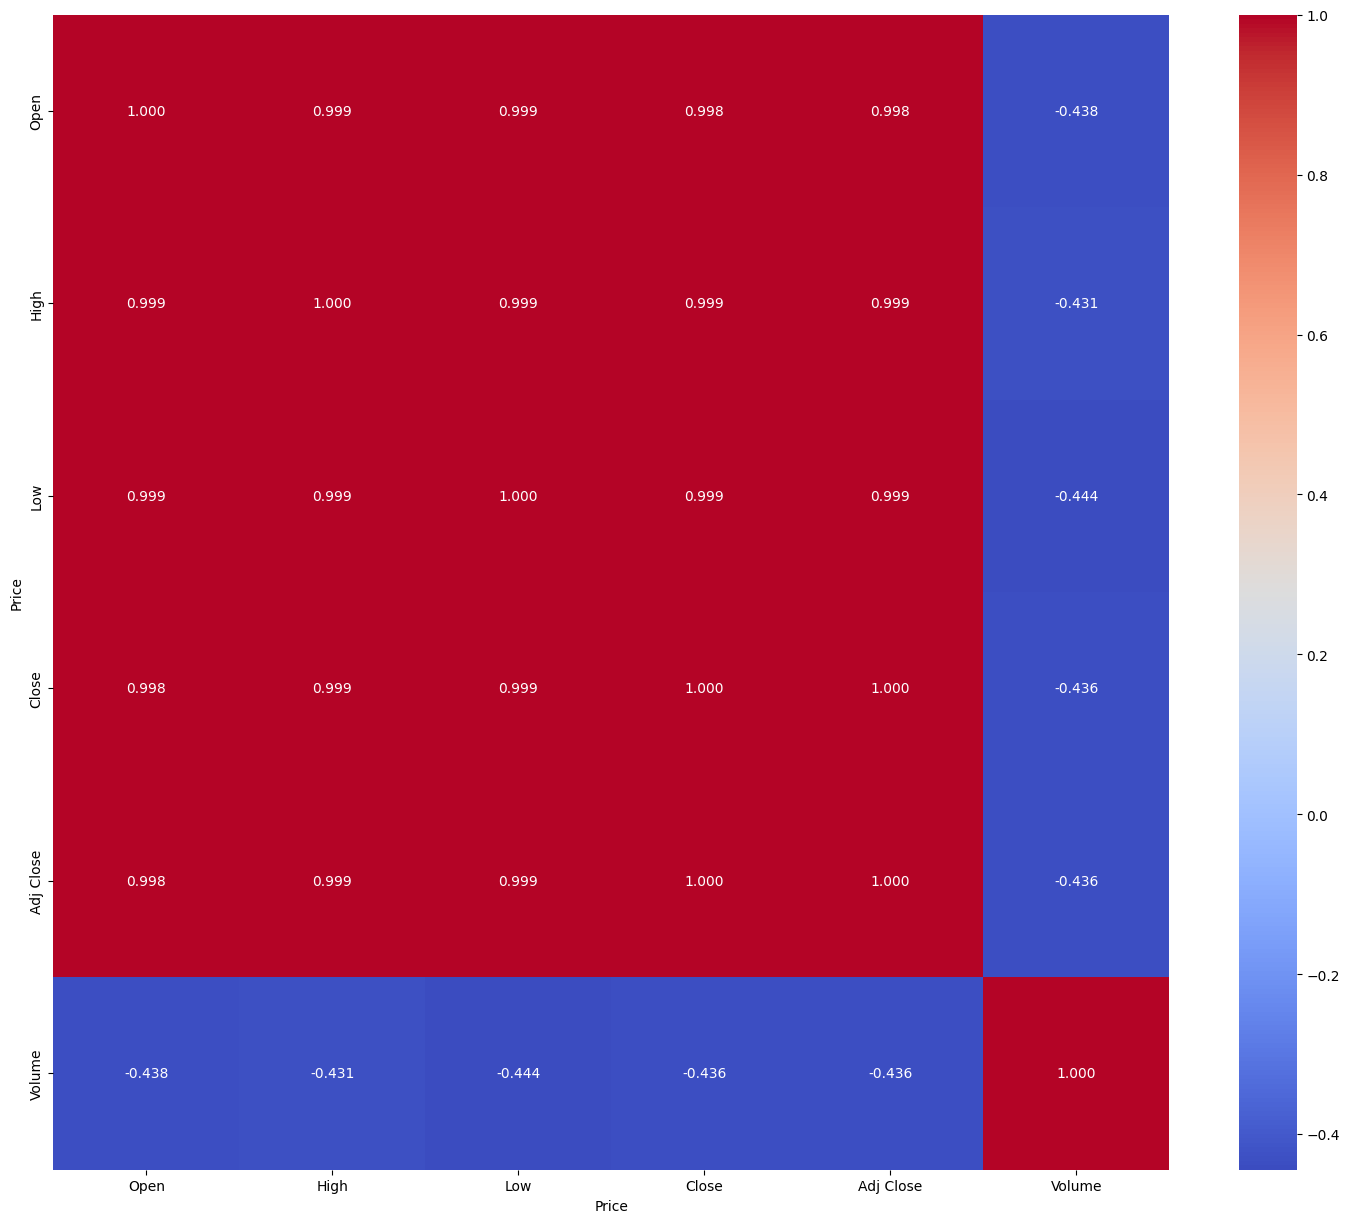

In [ ]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data.TSLA.corr(),annot=True,fmt="1.3f",cmap='coolwarm')

Matrices de corrélation de Mirochips

<Axes: xlabel='Price', ylabel='Price'>

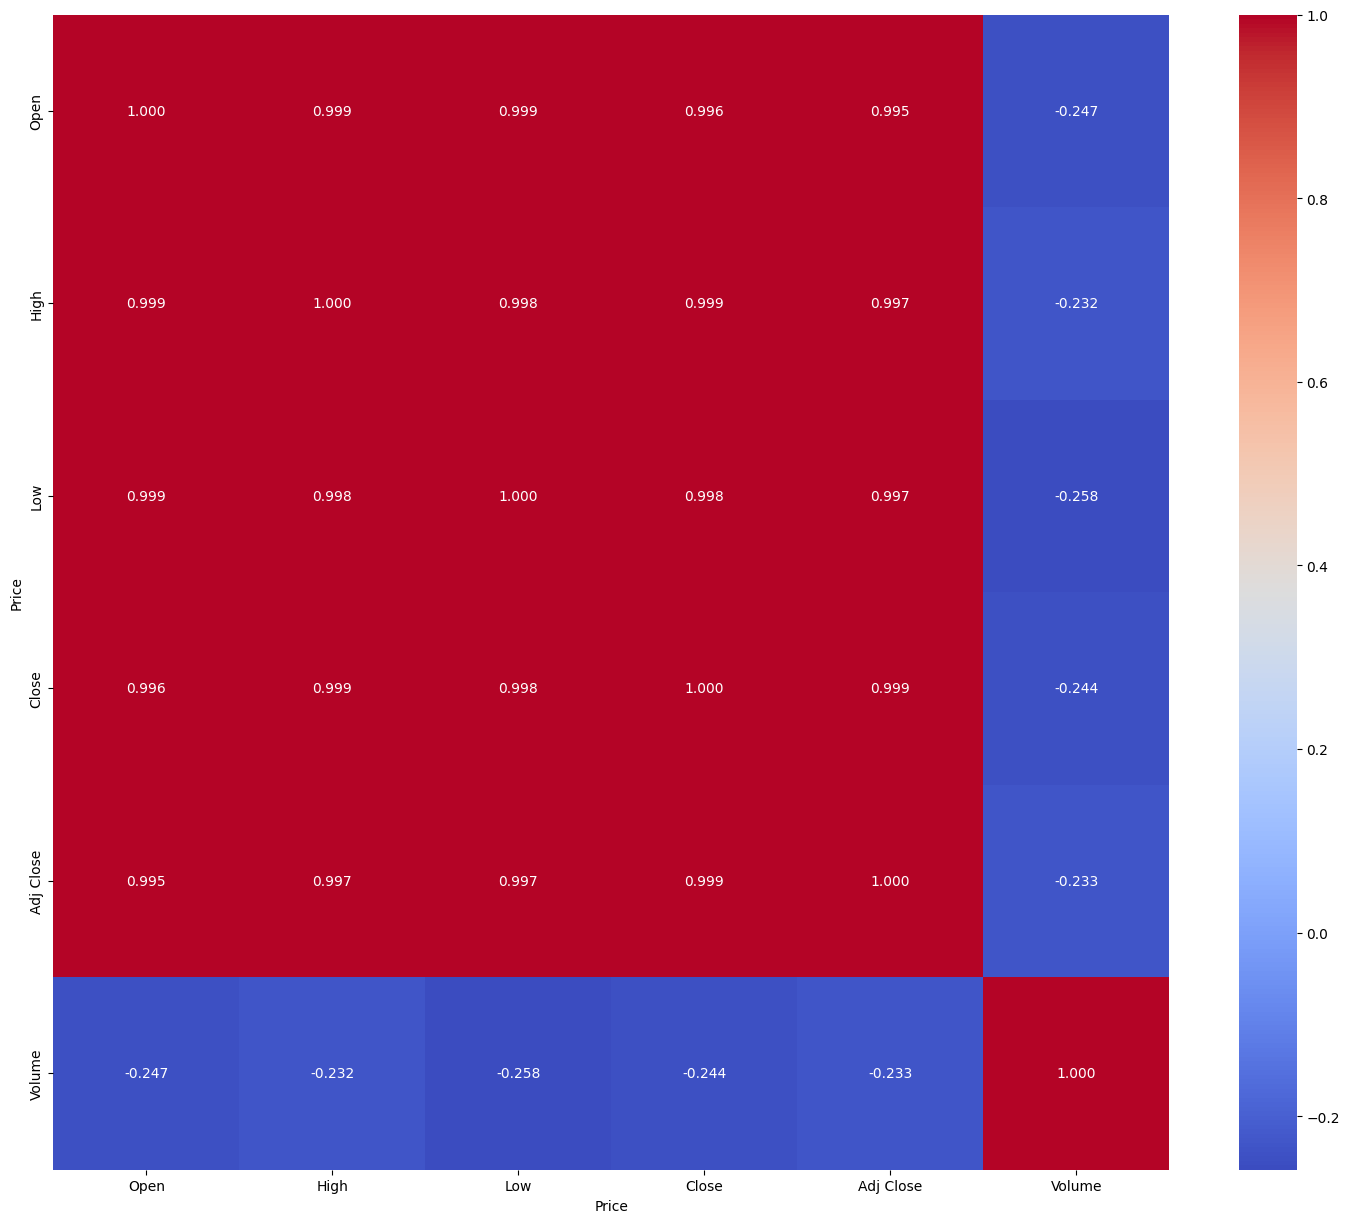

In [ ]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data.MCHP.corr(),annot=True,fmt="1.3f",cmap='coolwarm')

In [ ]:
stats_auto(data.TSLA.Close)

***************
count    1271.000000
mean      171.482074
std       107.913951
min        11.931333
25%        50.502666
50%       201.563339
75%       251.470001
max       409.970001
Name: Close, dtype: float64
***************
Dispersion moyenne: 62.93016422922471
Dispersion mediane: 99.70430908301542


In [ ]:
data.TSLA.Close.skew()-0

-0.1700418928320353

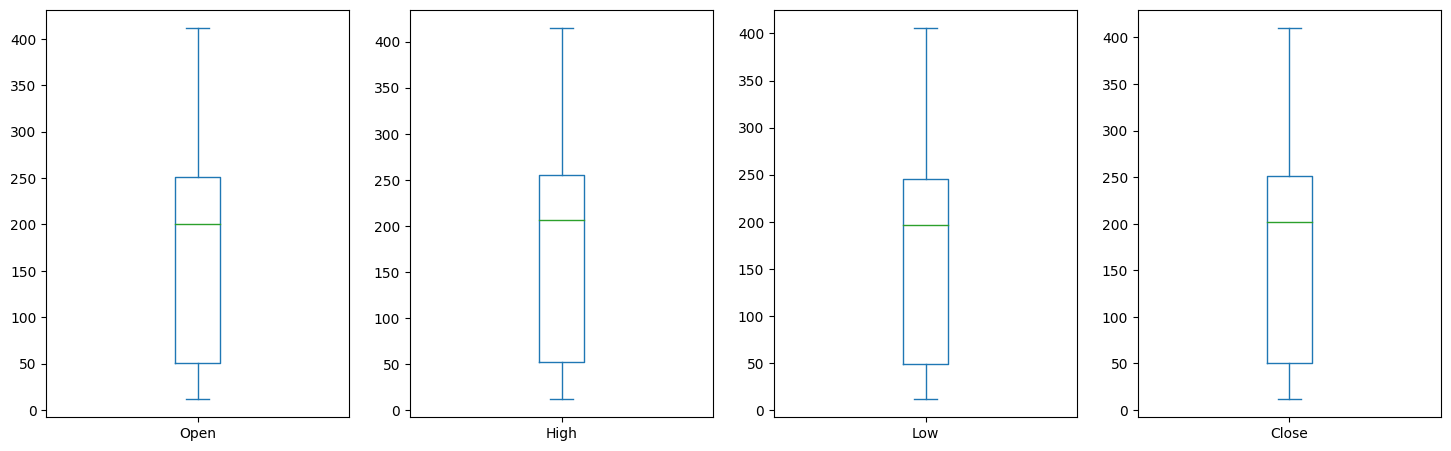

In [ ]:
data.TSLA.iloc[:, : 4].plot(kind='box',
        subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(18,18))
plt.show()

#### Conclusion pour TESLA

Le prix de clôture varie entre 11.93 (min) et 409.97(max) avec une moyenne de 171.48(mean) et un écart-type de 107.91.

Le prix de clôture est dispersée de l'ordre de 62% (std/mean).

Il n'y a pas de prix considerés comme etant aberrants(IQR).

Il n'y a aucune donnée manquates ou dupliquée.

Nous disposons de 1271 observation sur la valeur de fermeture de TESLA, qui varie entre 11.93 et 409.97 avec une moyenne de 171.48.

l'écart type d'environ 107,91, ce qui est assez élevé, suggérant que les prix de clôture varient considérablement.

25% des valeurs de fermeture sont inferieure à 50.50.

50% des valeurs de fermeture sont inferieure à 201.56 et 75% sont supérieur à 251.47.

La dispersion moyenne de 62.93 nous indique que l'écart type est 62.93% de la moyenne des prix de clôture. C'est une mesure de dispersion relative à la moyenne. En outre les valeurs de fermeture du marché sont hétérogènes, car la dispersion moyenne est supérieur à 50%.

La dispersion de la médiane indique que l'IQR est 99.70% de la médiane des prix de clôture. Cela suggère une distribution relativement large des données autour de la médiane, particulièrement si l'on considère que c'est une mesure moins sensible aux valeurs extrêmes que la dispersion moyenne.
Cette dispersion nous montre que les données sont dispersées sur un large éventail de valeurs.

In [ ]:
stats_auto(data.MCHP.Close)

***************
count    1271.000000
mean       64.811046
std        15.433216
min        27.885000
25%        50.017500
50%        69.040001
75%        77.340000
max        93.940002
Name: Close, dtype: float64
***************
Dispersion moyenne: 23.812631637294956
Dispersion mediane: 39.574883931869856


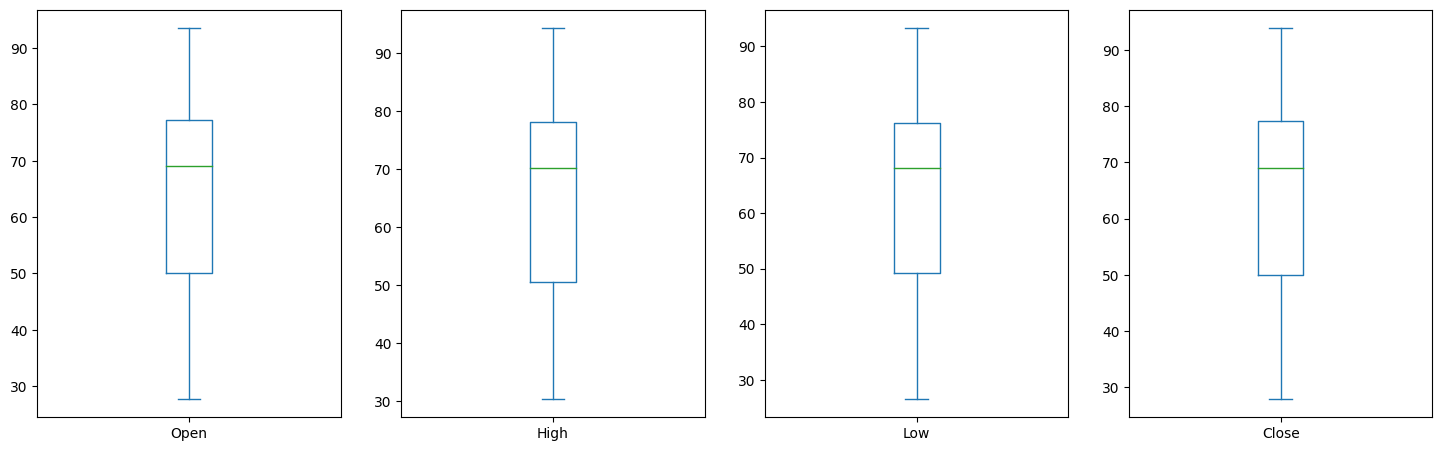

In [ ]:
data.MCHP.iloc[:, : 4].plot(kind='box',
        subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(18,18))
plt.show()

#### Conclusion pour MICROCHIPS

Le prix de clôture varie entre 27.88 (min) et 93.94(max) avec une moyenne de 64.81(mean) et un écart-type de 15.43.

Le prix de clôture est dispersée de l'ordre de 23% (std/mean).

Il n'y a pas de prix considerés comme etant aberrants(IQR).

Il n'y a aucune donnée manquates ou dupliquée.

l'écart type d'environ 15.43, suggére que les prix de clôture ne varient pas beaucoup.

25% des valeurs de fermeture sont inferieure à 50.01.

50% des valeurs de fermeture sont inferieure à 69.04 et 75% sont supérieur à 77.34.

La dispersion moyenne de 23.81 nous indique que l'écart type est 23.81% de la moyenne des prix de clôture. C'est une mesure de dispersion relative à la moyenne. En outre ont pourrait dire que les valeurs de fermeture du marché sont assez homogène, car la dispersion moyenne est inférieur à 50%, cela dit il nous faut interpréter ces résultats avec prudence car dans le contexte des marchés financiers, même une dispersion moyenne relativement faible peut représenter des fluctuations significatives en termes de valeur monétaire.

La dispersion de la médiane indique que l'IQR est 39.57% de la médiane des prix de clôture. Cela suggère une distribution relativement faible des données autour de la médiane.
Cette dispersion nous montre que les données ne sont pas dispersées sur un large éventail de valeurs.

## Test normalité

Les statistiques descriptives des données (moyenne, médiane, valeur minimale, valeur maximale, écartype) nous permet d'avoir une idée sur le niveau du risque et l'évolution de ces données au cours du temps. Les coefficients « Skewness », « Kurtosis » et la statistique du test de « Jarque-Bera » nous permet de tester la normalité des séries étudiées.

En effet, le coefficient « Kurtosis » est un coefficient qui mesure le degré d'aplatissement de la distribution. Lorsqu'il est égal à 3, la distribution suit donc la loi normale. En revanche, un coefficient inférieur à 3 indique que la distribution est plus aplatie que la loi normale (platykurtique), alors qu'un coefficient de Kurtosis supérieur à 3 indique que la distribution est pointue (leptokurtique).

Le coefficient de « Skewness » est un coefficient qui mesure le degré d'asymétrie de la distribution. Lorsque ce coefficient est négatif, la distribution est asymétrique vers la gauche, lorsqu'il est positif, la distribution est asymétrique vers la droite, alors que lorsqu'il est nul cela signifie que la distribution est symétrique et elle suit la loi normale.


In [ ]:
def normality_test(series, label):

    _, p_value = sp.stats.shapiro(series)

    if p_value < 0.5:
        print(f'La p_value de {label}: {p_value} < 0.5 alors, la distribution ne suit pas une loi normale.')
    else:
        print(f'La p_value de {label}: {p_value} > 0.5 alors, la distribution suit une loi normale.')

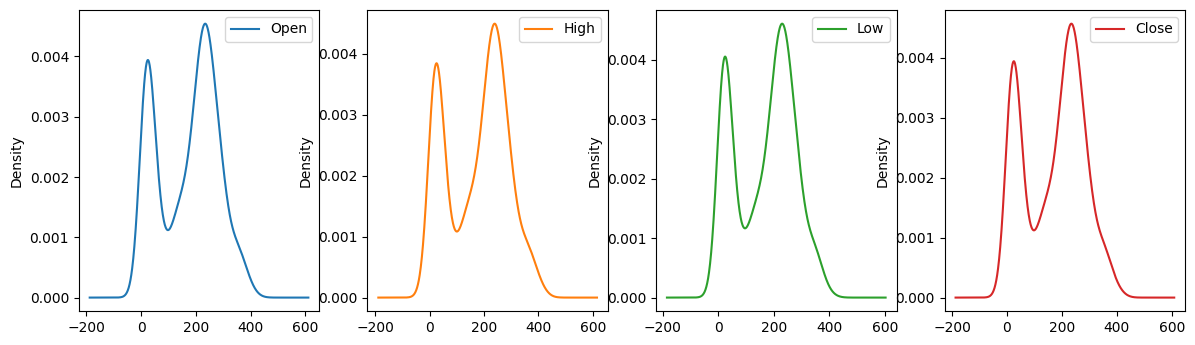

In [ ]:
data.TSLA.iloc[:, : 4].plot(kind='density',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

<Axes: ylabel='Density'>

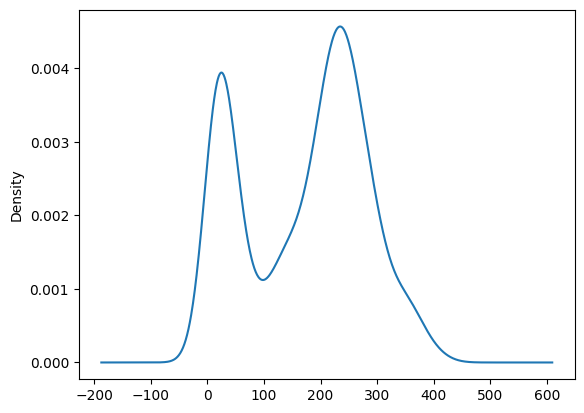

In [ ]:
data.TSLA.Close.plot(kind="density")

In [ ]:
data.TSLA.kurtosis()-3

Price
Open        -4.191849
High        -4.182691
Low         -4.208464
Close       -4.194060
Adj Close   -4.194060
Volume       9.371430
dtype: float64

In [ ]:
normality_test(data.TSLA.Close, 'Tesla')

La p_value de Tesla: 4.828597879335183e-26 < 0.5 alors, la distribution ne suit pas une loi normale.


Le kurtosis est inférieur à 3 pour le prix de clôture indiquant que la distribution ne suit pas une loi normale, par contre le volume suit une loi normale.

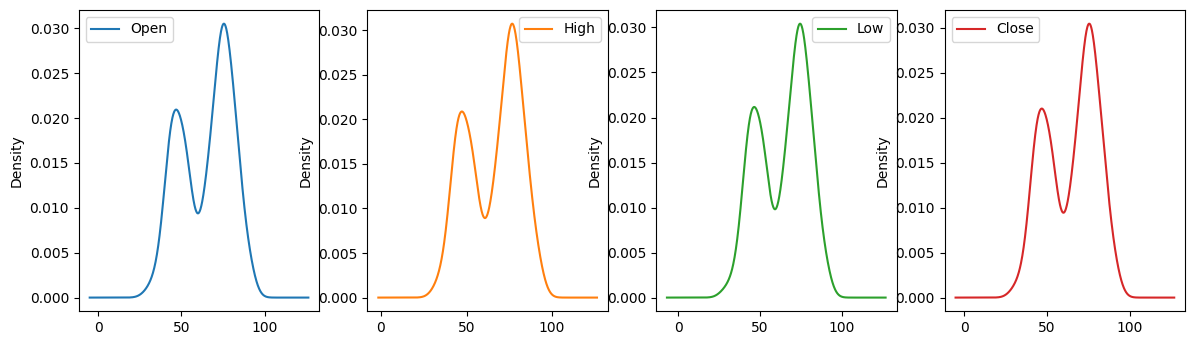

In [ ]:
data.MCHP.iloc[:, : 4].plot(kind='density',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

<Axes: ylabel='Density'>

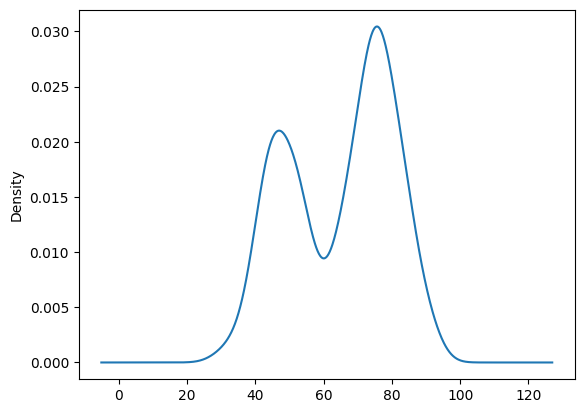

In [ ]:
data.MCHP.Close.plot(kind="density")

In [ ]:
normality_test(data.MCHP.Close, 'Microchip Tech')

La p_value de Microchip Tech: 3.188605313855621e-22 < 0.5 alors, la distribution ne suit pas une loi normale.


In [ ]:
data.MCHP.kurtosis()-3

Price
Open        -4.192583
High        -4.226442
Low         -4.163119
Close       -4.197703
Adj Close   -4.206463
Volume       6.282561
dtype: float64

Le kurtosis est inférieur à 3 pour le prix de clôture indiquant que la distribution ne suit pas une loi normale, par contre le volume suit une loi normale.

## Test de stationnarité

In [ ]:
from statsmodels.tsa.stattools import adfuller as DukeyFuller_test

def stationarity(series, label):

    p_value = DukeyFuller_test(series)[1]

    if p_value > 0.05:
        print(f"La p_value de {p_value} > 5%: Il n'y a pas assez de preuves pour dire que la série de {label} est stationaire")
    else:
        print(f"La p_value de {p_value} <= 5%: La série de {label} est stationaire")

In [ ]:
plot_closings()

In [ ]:
stationarity(data.TSLA.Close, 'Tesla')

La p_value de 0.39159510470304365 > 5%: Il n'y a pas assez de preuves pour dire que la série de Tesla est stationaire


In [ ]:
stationarity(data.MCHP.Close, 'Microchip Tech')

La p_value de 0.29022599492900414 > 5%: Il n'y a pas assez de preuves pour dire que la série de Microchip Tech est stationaire


#### Décomposition des séries

In [ ]:
def decompose_seasonal(series, label, peridod = 12):

    # Seasonal decomposition
    decomposition = seasonal_decompose(series, model='additive', period=peridod)
    fig = decomposition.plot()

    fig.set_figwidth(12)
    fig.set_figheight(5)
    fig.suptitle(f'Decomposition of Additive {label} Time Series')

    # par pas de 12
    for ax in fig.axes:
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))
        plt.setp(ax.get_xticklabels(), rotation=90)

    plt.show()

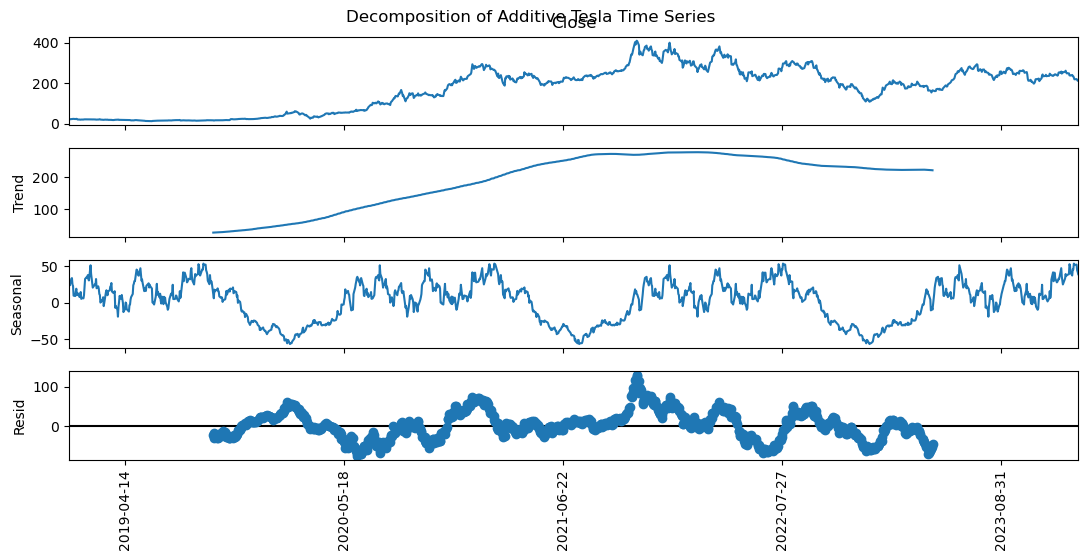

In [ ]:
decompose_seasonal(data.TSLA.Close, 'Tesla', 365)

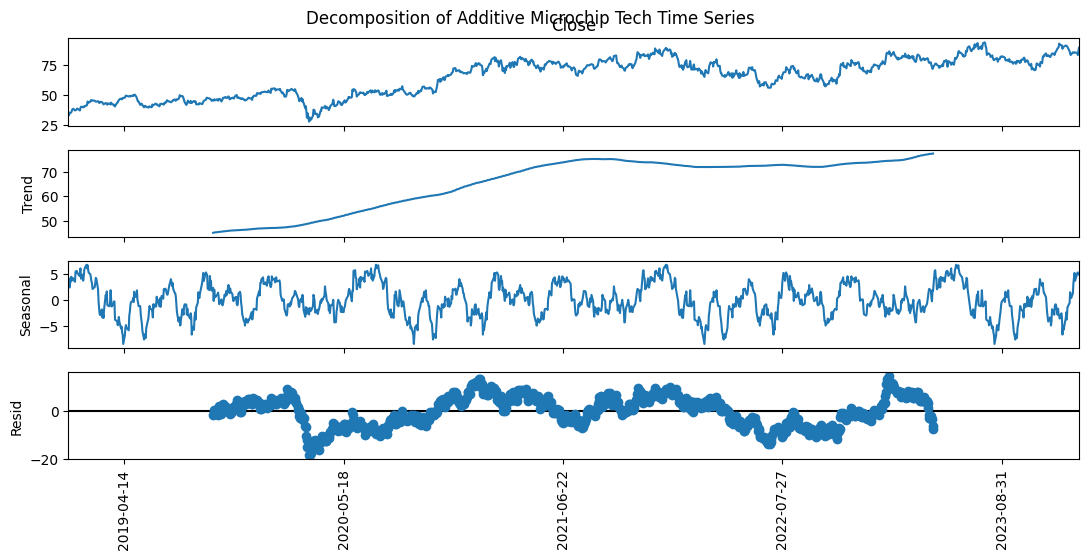

In [ ]:
decompose_seasonal(data.MCHP.Close, 'Microchip Tech', 365)

On observe une tendance plutôt à la hausse et une saisonalité, ce qui confirme les tests statistiques réalisées pluts haut.

## Correlation

### Correlation partielle et autocorrelation

In [ ]:
import statsmodels.tsa.api as smt

def autocorr(series):

    fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
    fig.set_figwidth(12)
    fig.set_figheight(4)
    smt.graphics.plot_acf(series, lags=30, ax=axes[0])
    smt.graphics.plot_pacf(series, lags=30, ax=axes[1])
    plt.tight_layout()

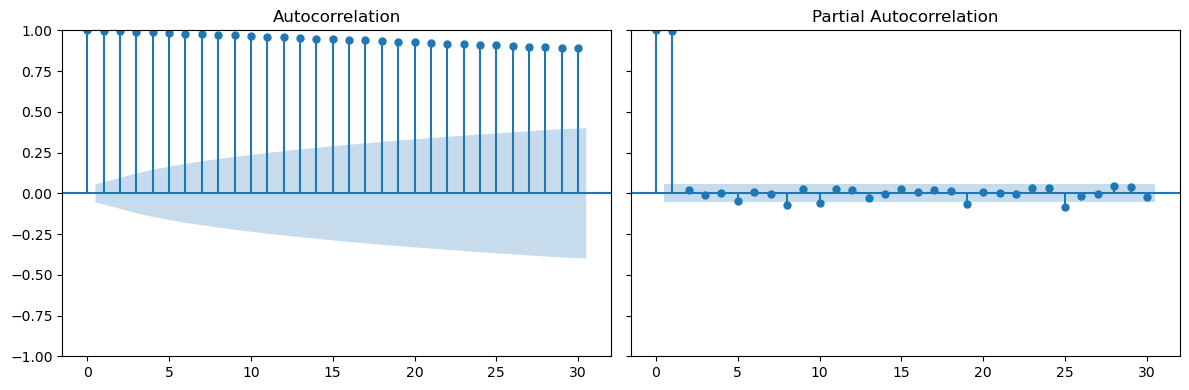

In [ ]:
autocorr(data.TSLA.Close)

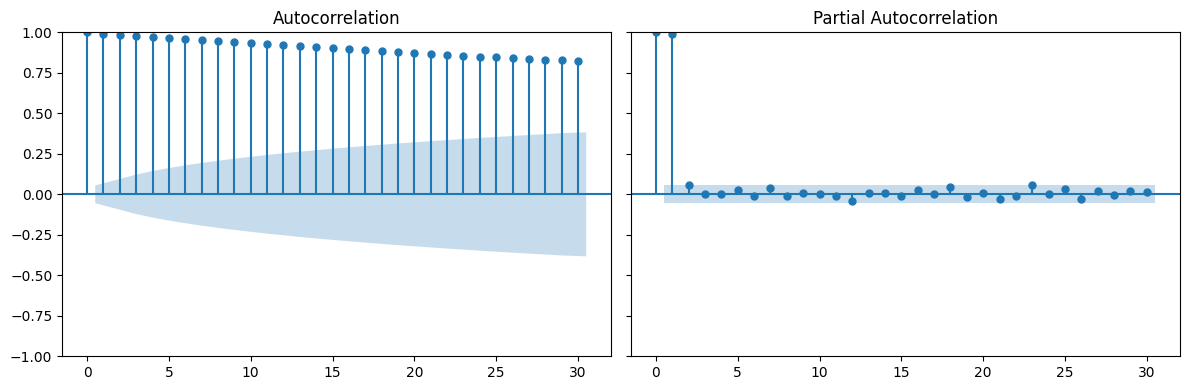

In [ ]:
autocorr(data.MCHP.Close)

Nous constatons une forte corrélation positive pour les deux sources de données, car les points se situent tous en déhors de la zone bleue du plot d'autocorrelation.

Test de saisonalité

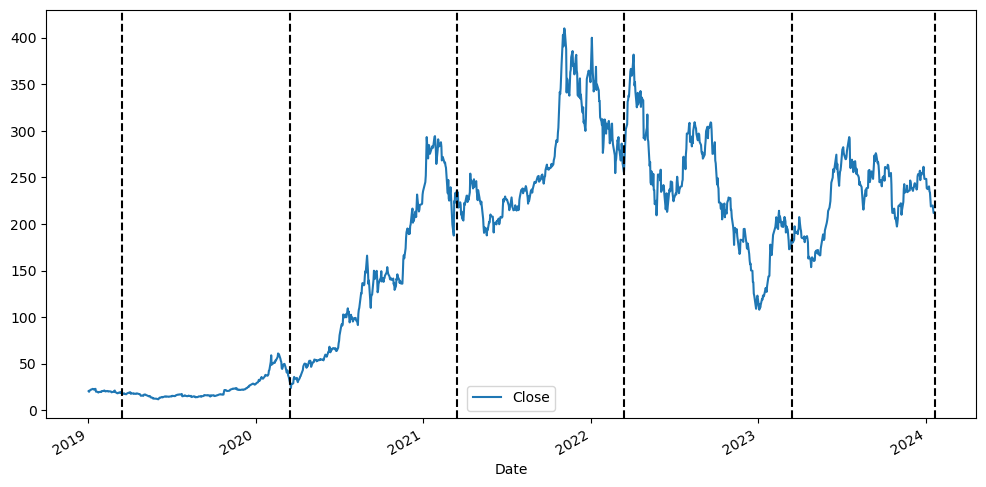

In [ ]:
ax = data.TSLA.plot(y='Close', figsize=(12,6))

xcoords = ['2019-03-15', '2020-03-15','2021-03-15', '2022-03-15', '2023-03-15', '2024-01-20']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
plt.show()

On constate qu'environ chaque 10 mars il y'a une chute du marché, l'on observe ici au moins une saisonalité annuel.

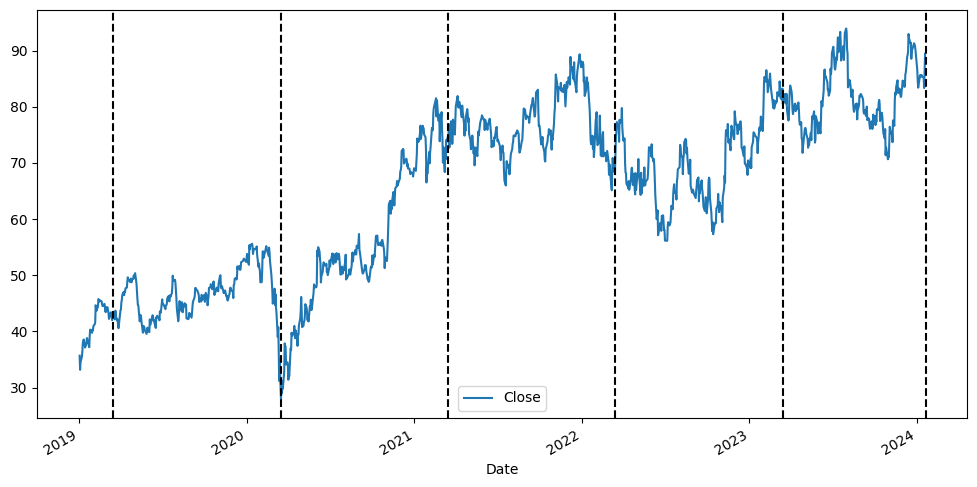

In [ ]:
ax = data.MCHP.plot(y='Close', figsize=(12,6))

xcoords = ['2019-03-15', '2020-03-15','2021-03-15', '2022-03-15', '2023-03-15', '2024-01-20']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
plt.show()

On constate qu'environ chaque 10 mars il y'a une chute du marché, l'on observe ici au moins une saisonalité annuel.

## Appréhendez le lissage exponentiel

Nous prédirons la variable Close des données de tesla

In [ ]:
tsla_y = data.TSLA.Close
mchp_y = data.MCHP.Close

In [ ]:
plot_solo_closings(tsla_y, 'Tesla')

Nous allons utiliser le lyssage exponentiel car il permet de réduire la volatilité des données sans perdre trop d'information sur les tendances.

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
def expo_smoothing(train, test, s_period = 7):

    """
        Cette fonction va faire l'entrainement avec ExponentialSmoothing et renvoie les résultat du test.

        Paramètres:

         - train : Training set
         - test : Test set
         - s_period : Periode saisonal, par défaut = 7 (weekly).

            Weekly Seasonality (5 or 7)
            Monthly Seasonality (20 to 22)
            Quarterly Seasonality (60 to 65)
            Semi-Annual Seasonality (120 to 130)
            Annual Seasonality (252)

    """

    tsla_exp_model = ExponentialSmoothing(np.asarray(train),
                                      seasonal_periods = s_period,
                                      trend = 'add', seasonal = 'add').fit()

    resutls = tsla_exp_model.forecast(test.shape[0])

    plt.figure(figsize = (18, 10))
    plt.plot(test.values, label = 'Prix de clôture', color = 'green')
    plt.plot(resutls, label = 'Predit', color = 'red')

    plt.ylabel('Prix de clôture (en Dollar)')
    plt.xlabel('Jour de trading')
    plt.title('Prédiction du prix de clôture au cours du temps par la méthode de Holt-Winters')
    plt.legend(loc = 'best')
    plt.show()

    return resutls

In [ ]:
# Séparation en train et test set
# TESLA
tsla_y_train = tsla_y[0 : 1000]
tsla_y_test = tsla_y[1000 : 1271]

# MICROCHIPS
mchp_y_train = mchp_y[0 : 1000]
mchp_y_test = mchp_y[1000 : 1271]

In [ ]:
print(f"Tesla training set: {tsla_y_train.shape}, test set: {tsla_y_test.shape}")

Tesla training set: (1000,), test set: (271,)


In [ ]:
print(f"Microchips training set: {mchp_y_train.shape}, test set: {mchp_y_test.shape}")

Microchips training set: (1000,), test set: (271,)


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

def best_seasonal_period(train, test):

    best_period = None
    best_error = float('inf')

    for period in range(2, 252):  # Assuming you suspect monthly seasonality.

        model = ExponentialSmoothing(np.asarray(train), seasonal_periods=period, trend='add', seasonal='add').fit()

        predictions = model.forecast(test.shape[0])
        error = mean_squared_error(test, predictions)

        if error < best_error:
            best_error = error
            best_period = period

    print(f"Best seasonal period: {best_period}")
    return best_period

In [ ]:
filterwarnings('ignore', category = UserWarning)
possible_seasonal_period = best_seasonal_period(tsla_y_train, tsla_y_test)

Best seasonal period: 207


La fonction best_seasonal_period() nous apprend que la meilleur saisonalité est de 207 pour data.TSLA et ça se vérifie avec le plot ci-bas.

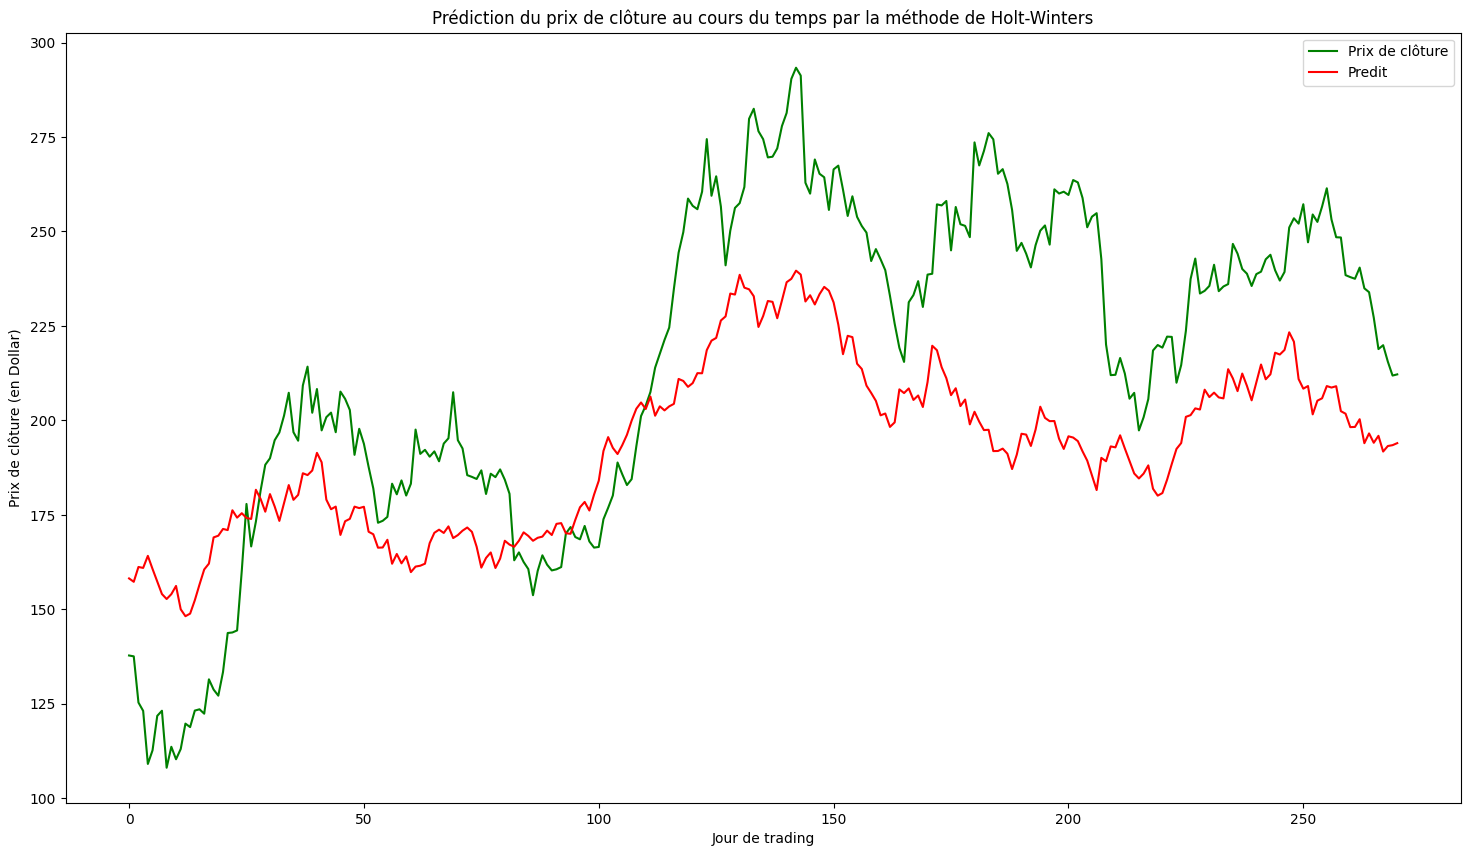

In [ ]:
tsla_exp_sm_results = expo_smoothing(tsla_y_train, tsla_y_test, possible_seasonal_period)

In [ ]:
filterwarnings('ignore', category = UserWarning)
mchp_best_seasonal_period = best_seasonal_period(mchp_y_train, mchp_y_test)

Best seasonal period: 112


La fonction best_seasonal_period() nous apprend que la meilleur saisonalité est de 112 pour data.MCHP et ça se vérifie avec le plot ci-bas.

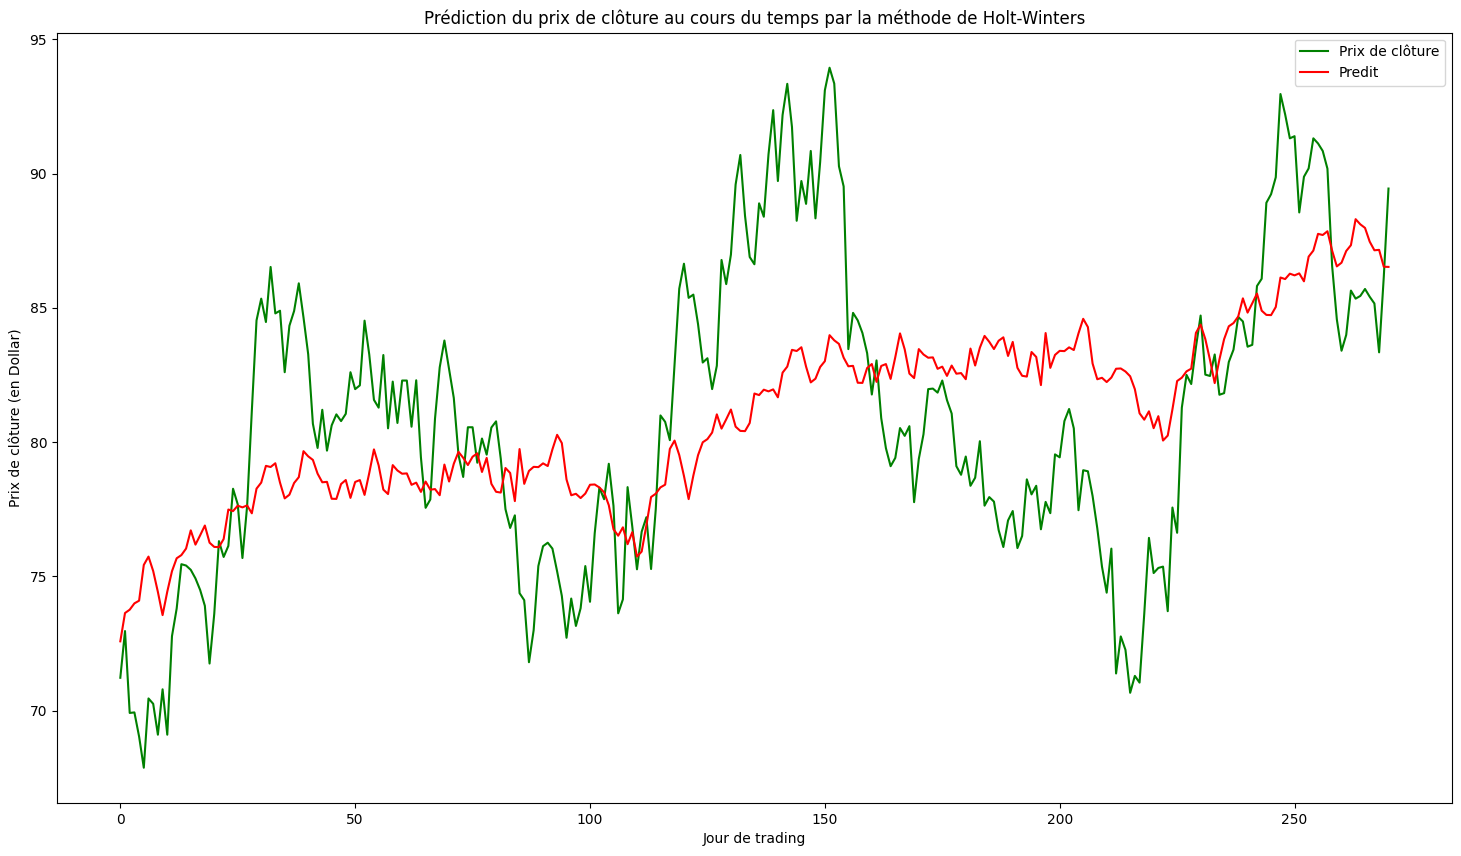

In [ ]:
mchp_exp_sm_results = expo_smoothing(mchp_y_train, mchp_y_test, mchp_best_seasonal_period)

In [ ]:
tsla_exp_res = pd.DataFrame()

tsla_exp_res["realite"] = tsla_y_test
tsla_exp_res["prevision"] = tsla_exp_sm_results

tsla_exp_res

realite   prevision
Date                              
2022-12-20  137.800003  158.195190
2022-12-21  137.570007  157.299174
2022-12-22  125.349998  161.224688
2022-12-23  123.150002  160.974659
2022-12-27  109.099998  164.164887
...                ...         ...
2024-01-12  218.889999  195.931872
2024-01-16  219.910004  191.768339
2024-01-17  215.550003  193.231782
2024-01-18  211.880005  193.458627
2024-01-19  212.190002  193.994402

[271 rows x 2 columns]

In [ ]:
mchp_exp_res = pd.DataFrame()

mchp_exp_res["realite"] = mchp_y_test
mchp_exp_res["prevision"] = mchp_exp_sm_results

mchp_exp_res

realite  prevision
Date                            
2022-12-20  71.220001  72.576885
2022-12-21  72.959999  73.631063
2022-12-22  69.910004  73.755581
2022-12-23  69.930000  73.990762
2022-12-27  69.029999  74.091072
...               ...        ...
2024-01-12  85.410004  87.462506
2024-01-16  85.160004  87.141118
2024-01-17  83.339996  87.156719
2024-01-18  86.160004  86.528184
2024-01-19  89.440002  86.521857

[271 rows x 2 columns]

A partir des prédictions ci-haut on constate que l'exponentialSmoothing n'arrive pas à capter le mouvement des prix de clôture du marché, il faut donc passer à un modèle plus sophistiqué

## 4. Créez des modèles des modèles avec les processus AR(3), MA(3) , interprétez vos

### AR(3) model

In [ ]:
def plotting_ar_ma3(train, test, predictions, model = 'Not specified', compagnie = "Not given"):

    # Plot the results
    plt.figure(figsize = (18, 10))

    plt.plot(np.arange(len(train), len(train) + len(test)),
            test, label='Actual Data', color='green')

    plt.plot(np.arange(len(train), len(train) + len(test)),
            predictions, label='AR(3) Predictions', color='red')

    plt.ylabel('Prix de clôture (en Dollar)')
    plt.xlabel('Jour de trading')
    plt.title(f'Prédiction avec un modèle {model} sur la compagnie {compagnie}')
    plt.legend()
    plt.show()

In [ ]:
filterwarnings('ignore', category = UserWarning)
# Fit the AR(3) model
tsla_ar_model = AutoReg(tsla_y_train, lags = 3).fit()


# Make predictions
tsla_ar_preds = tsla_ar_model.predict(start = len(tsla_y_train),
                            end = len(tsla_y_train) + len(tsla_y_test) - 1, dynamic = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



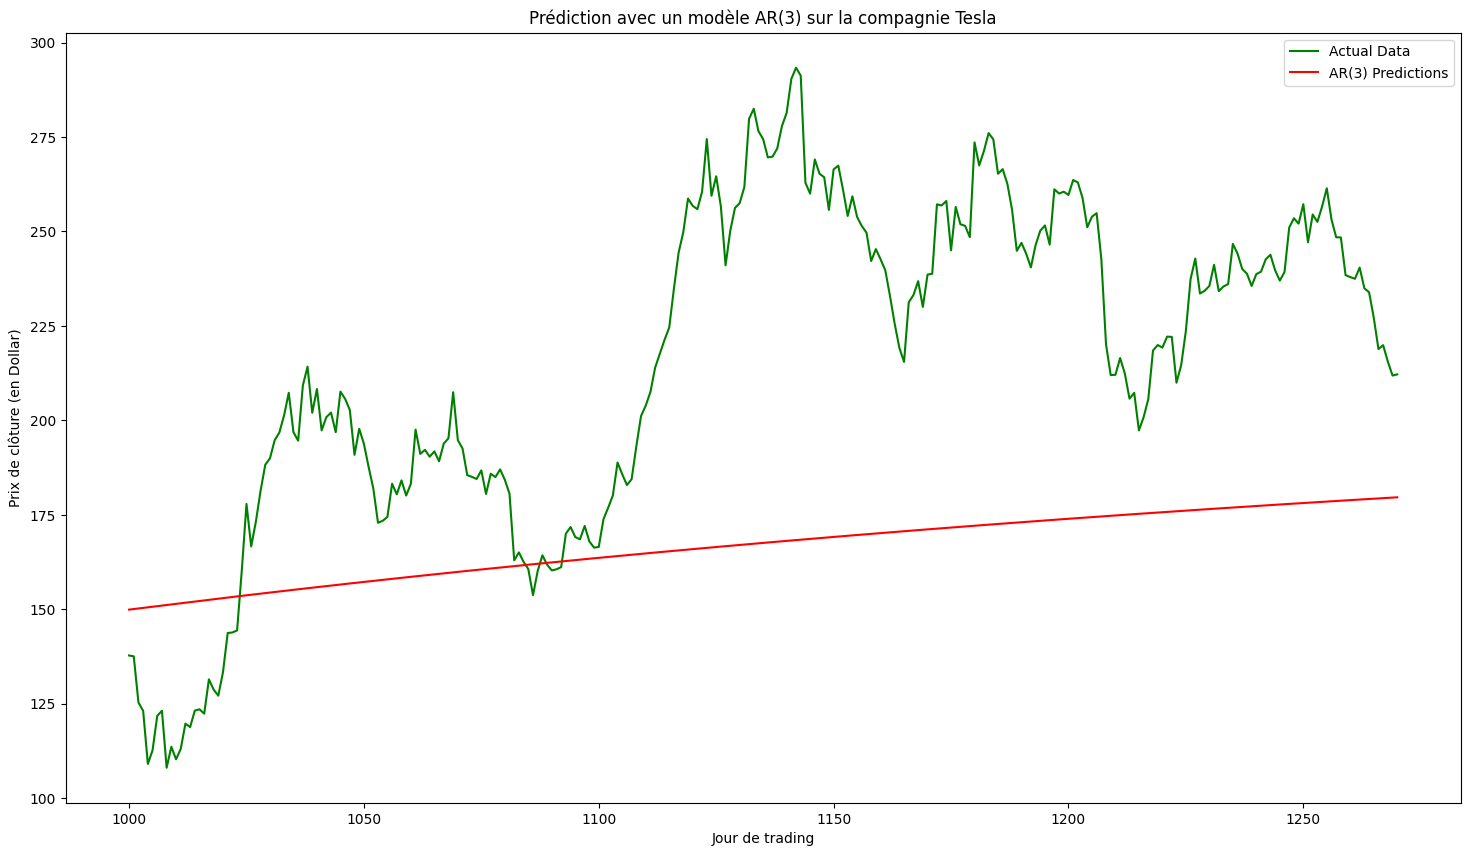

In [ ]:
plotting_ar_ma3(tsla_y_train, tsla_y_test, tsla_ar_preds, 'AR(3)', 'Tesla')

In [ ]:
# Fit the AR(3) model
mchp_ar_model = AutoReg(mchp_y_train, lags = 3).fit()

# Make predictions
mchp_ar_preds = mchp_ar_model.predict(start = len(mchp_y_train),
                            end = len(mchp_y_train) + len(mchp_y_test) - 1, dynamic = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



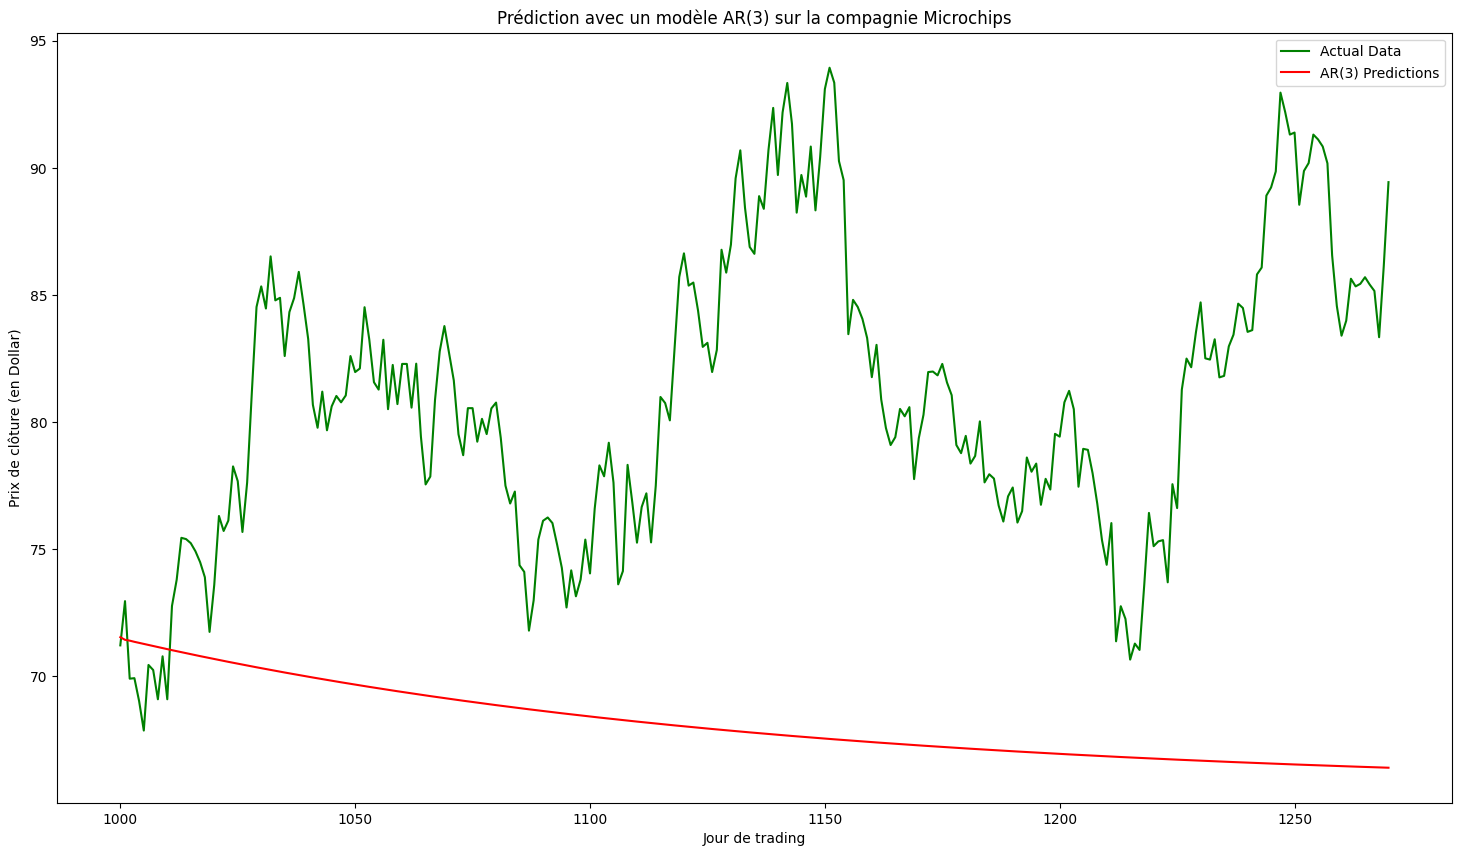

In [ ]:
plotting_ar_ma3(mchp_y_train, mchp_y_test, mchp_ar_preds, 'AR(3)', 'Microchips')

### MA(3) model

In [ ]:
filterwarnings('ignore', category = UserWarning)
# Fit the MA(3) model
tsla_ma_model = ARIMA(tsla_y_train, order = (0, 0, 3)).fit()

# Make predictions
tsla_ma_preds = tsla_ma_model.predict(start = len(tsla_y_train),
                                      end = len(tsla_y_train) + len(tsla_y_test) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



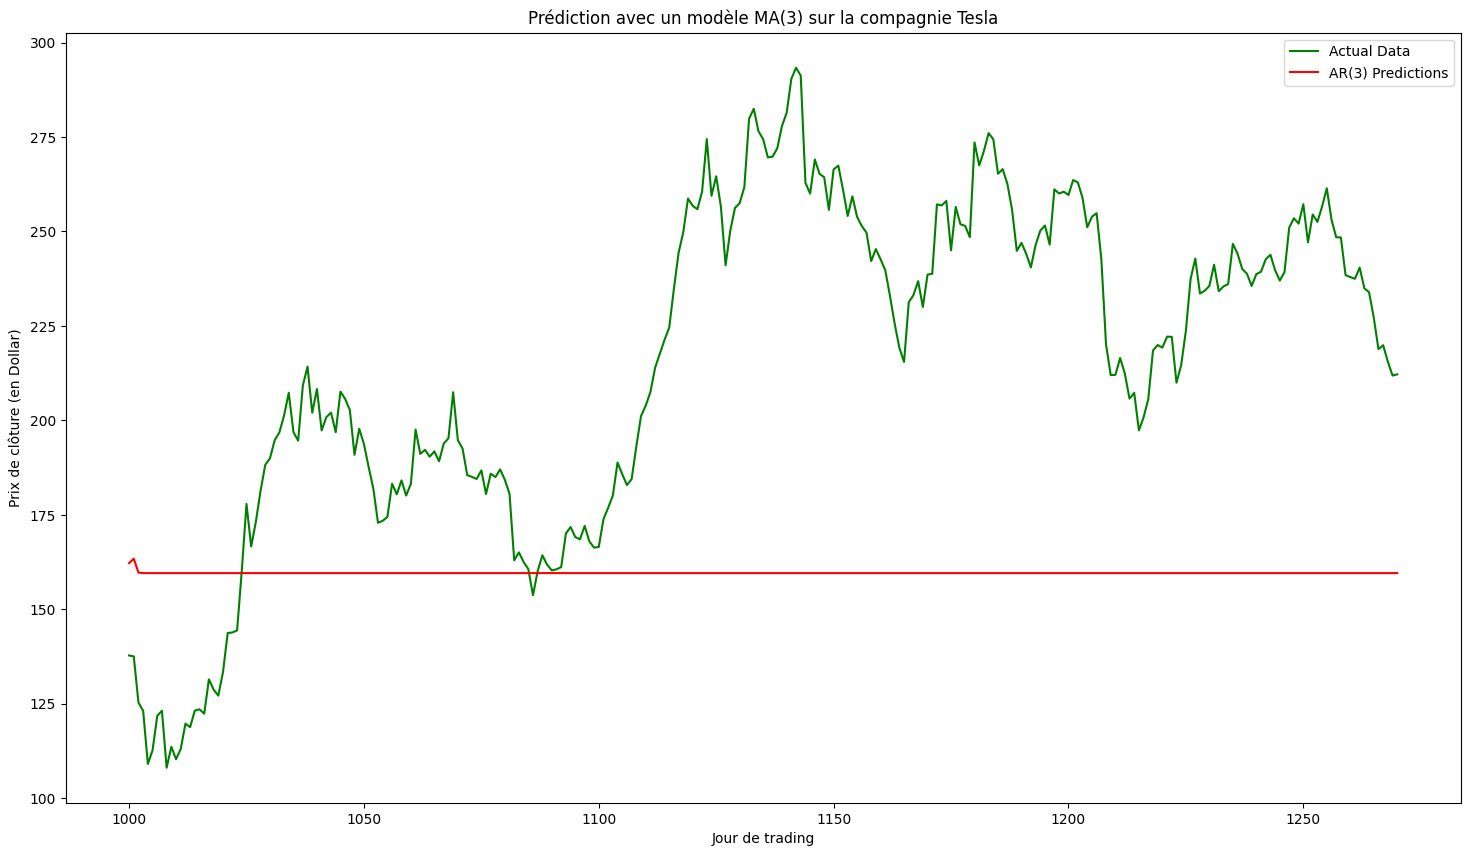

In [ ]:
plotting_ar_ma3(tsla_y_train, tsla_y_test, tsla_ma_preds, 'MA(3)', 'Tesla')

In [ ]:
filterwarnings('ignore', category = UserWarning)
# Fit the MA(3) model
mchp_ma_model = ARIMA(mchp_y_train, order = (0, 0, 3)).fit()

# Make predictions
mchp_ma_preds = mchp_ma_model.predict(start = len(mchp_y_train),
                                      end = len(mchp_y_train) + len(mchp_y_test) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



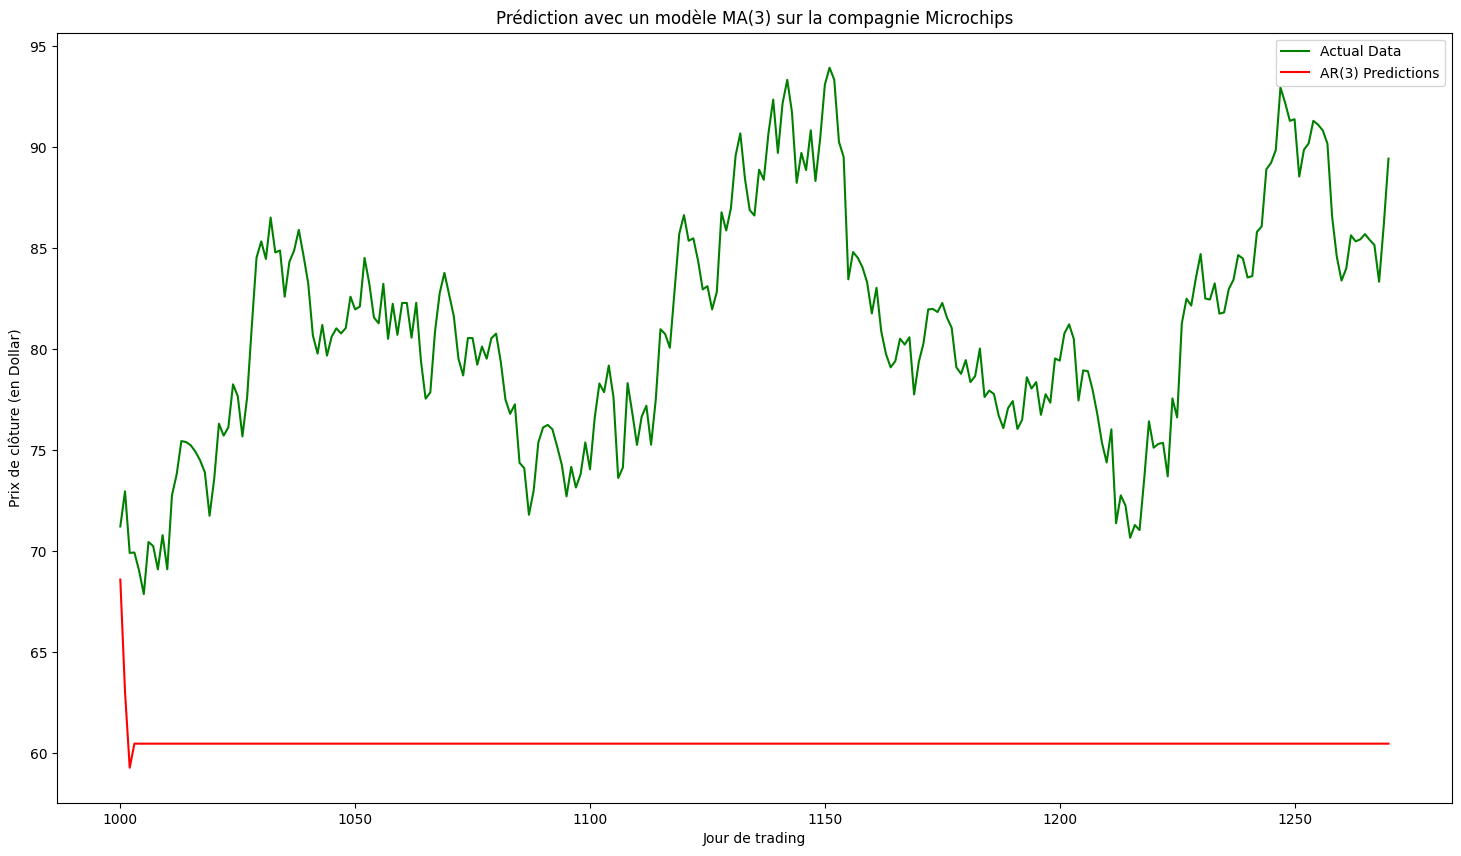

In [ ]:
plotting_ar_ma3(mchp_y_train, mchp_y_test, mchp_ma_preds, 'MA(3)', 'Microchips')

### Formules mathématiques obtenues par les modèles AR(3) et MA(3)

In [ ]:
print(f"Formules mathématiques (AR) tesla:\nYt = {tsla_ar_model.params[0]:.2f} + {tsla_ar_model.params[1]:.2f}Yt-1 + {tsla_ar_model.params[2]:.2f}Yt-2 + {tsla_ar_model.params[3]:.2f}Yt-3")

Formules mathématiques (AR) tesla:
Yt = 0.59 + 0.96Yt-1 + 0.05Yt-2 + -0.01Yt-3


In [ ]:
print(f"Formules mathématiques (MA) tesla:\nYt = {tsla_ma_model.params[0]:.2f} + {tsla_ma_model.params[4]:.2f}t + {tsla_ma_model.params[1]:.2f}Yt-1  + {tsla_ma_model.params[2]:.2f}Yt-2 + {tsla_ma_model.params[3]:.2f}Yt-3")

Formules mathématiques (MA) tesla:
Yt = 159.60 + 654.93t + 1.98Yt-1  + 1.83Yt-2 + 0.74Yt-3


In [ ]:
print(f"Formules mathématiques (AR) Microchips:\nYt = {mchp_ar_model.params[0]:.2f} + {mchp_ar_model.params[1]:.2f}Yt-1 + {mchp_ar_model.params[2]:.2f}Yt-2 + {mchp_ar_model.params[3]:.2f}Yt-3")

Formules mathématiques (AR) Microchips:
Yt = 0.50 + 0.90Yt-1 + 0.14Yt-2 + -0.04Yt-3


In [ ]:
print(f"Formules mathématiques (MA) Microchips:\nYt = {mchp_ma_model.params[0]:.2f} + {mchp_ma_model.params[4]:.2f}t + {mchp_ma_model.params[1]:.2f}Yt-1  + {mchp_ma_model.params[2]:.2f}Yt-2 + {mchp_ma_model.params[3]:.2f}Yt-3")

Formules mathématiques (MA) Microchips:
Yt = 60.46 + 14.40t + 1.56Yt-1  + 1.43Yt-2 + 0.69Yt-3


### Conclusion sur les test AR(3) et MA(3)

Selon les tests de stationarités éffectués plus haut, on sait que les séries ne sont pas stationnaire et vu que AR et MA assument que la série est stationnaire forcément les résultats ne sont pas bons.

Pistes d'amélioration: Appliquer
 - La différenciation
 - La transformation logarithmique

Cela dit la meilleure solution serait de passer à un modèle qui intégre le fait que les séries ne soient pas stationnaire, comme: AR(I)MA avec 'I' pour integrated.

## 5. Créez Les processus non stationnaires : ARIMA(p,q,d) et SARIMA(p,q,d)(P,Q,D,S) et interpretez vos resultats

#### Détermination des coefficients p, q et d

In [ ]:
def tsplot(y, lags=None, figsize=(20, 10), style='bmh'):
    """
        Fonction affichant le Test de Dickey–Fuller avec Autocorrélogrammes ACF et PACF
    """

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)

        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

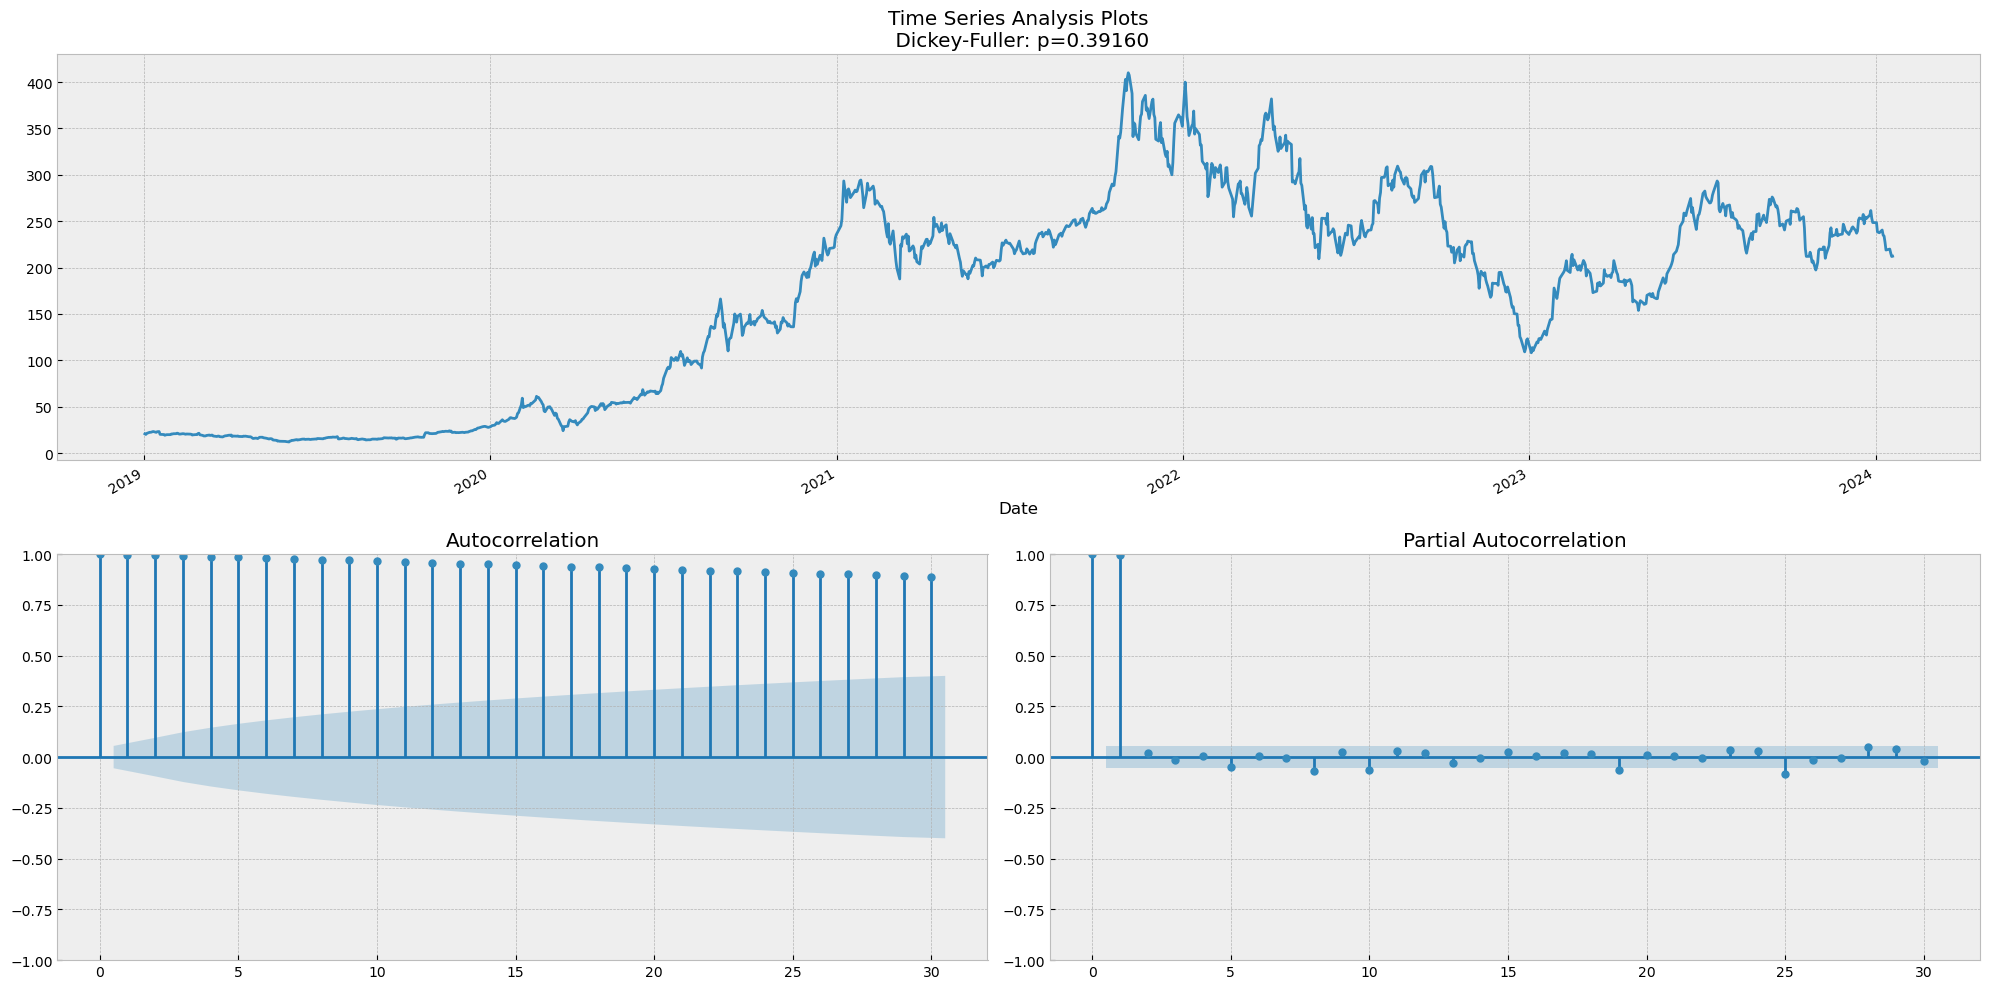

In [ ]:
tsplot(tsla_y, lags = 30)

Le graphe de l'autocorrélation suggère que les valeurs de la série temporelle sont corrélées avec elles-mêmes avec un décallage de 30. Ici, on observe une décroissance lente des barres, ce qui est typique des séries avec une tendance. L'autocorrélation reste significative pour de nombreux décalages, indiquant que la série possède une mémoire longue et que les valeurs passées influencent fortement les valeurs futures.

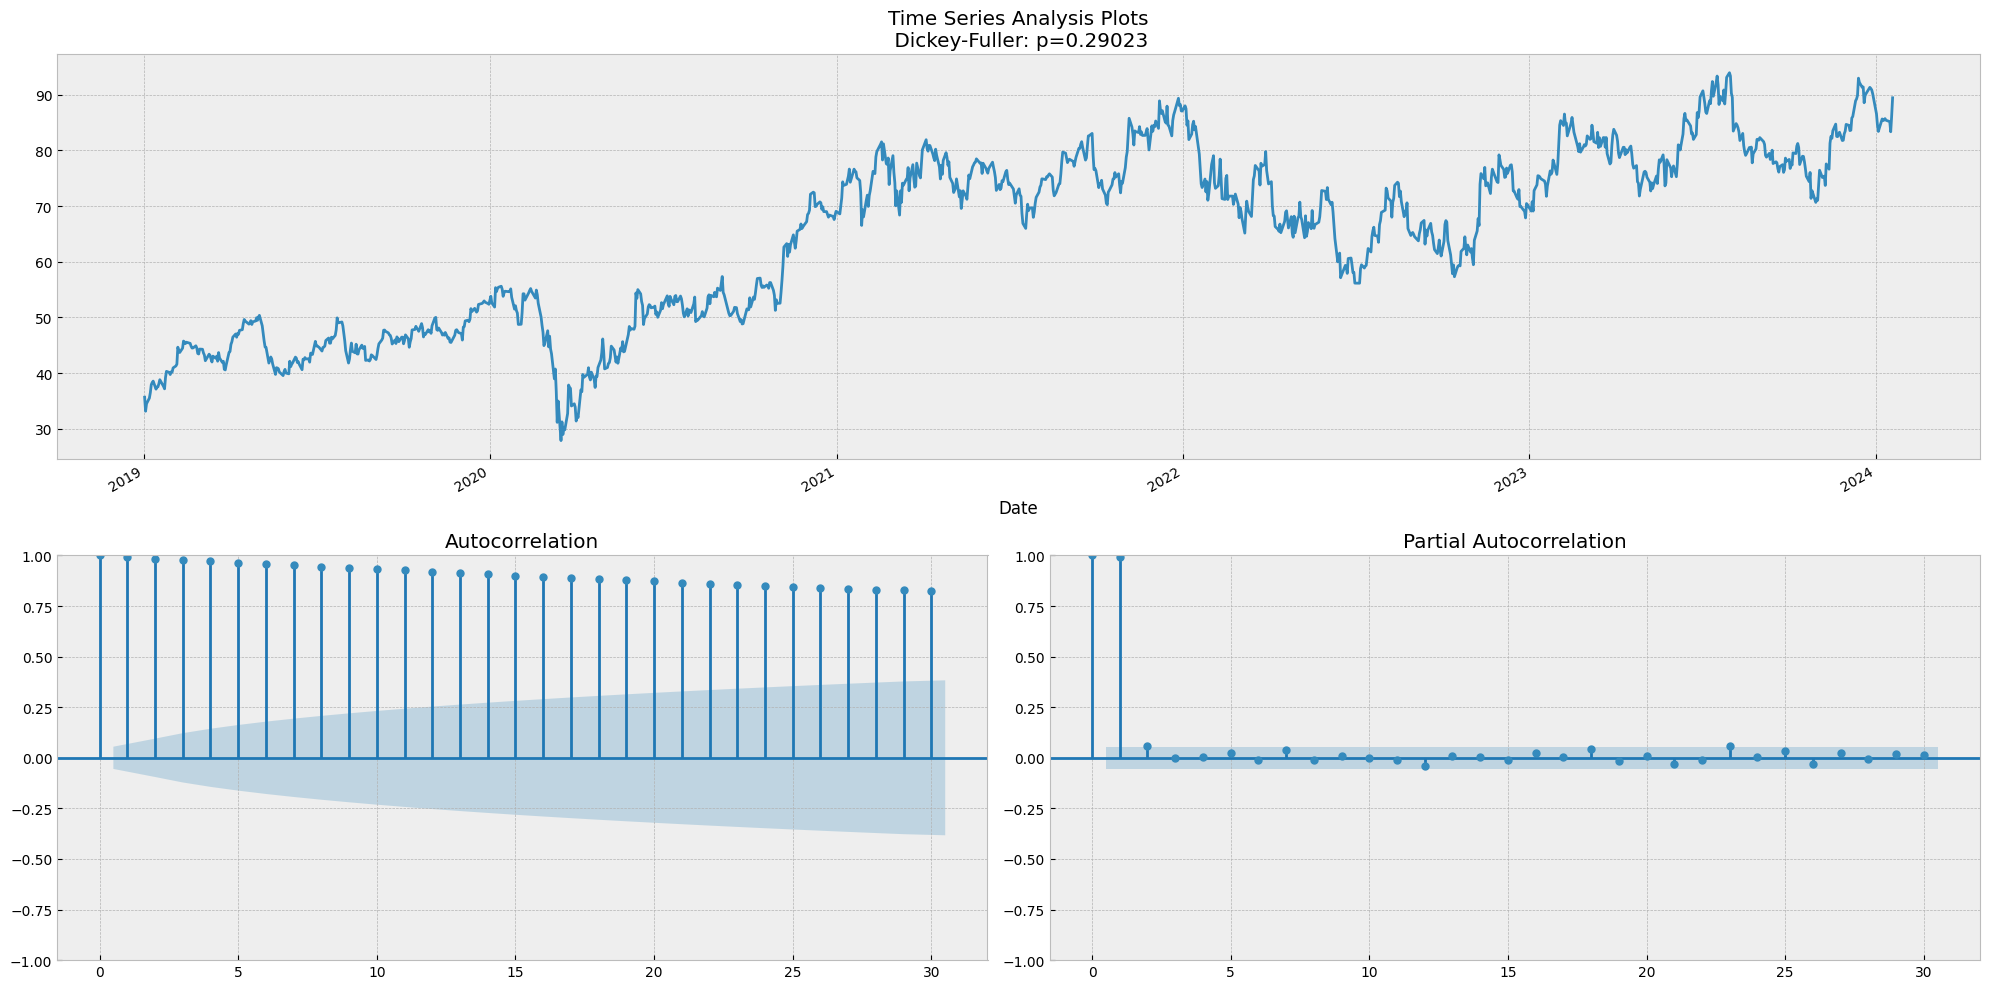

In [ ]:
tsplot(mchp_y, lags = 30)

Le graphe de l'autocorrélation suggère que les valeurs de la série temporelle sont corrélées avec elles-mêmes avec un décallage de 30. Ici, on observe une décroissance lente des barres, ce qui est typique des séries avec une tendance. L'autocorrélation reste significative pour de nombreux décalages, indiquant que la série possède une mémoire longue et que les valeurs passées influencent fortement les valeurs futures.

Puisque la série est non-stationnaire trouvons p, q et d. Commençons par d en différenciant les données:

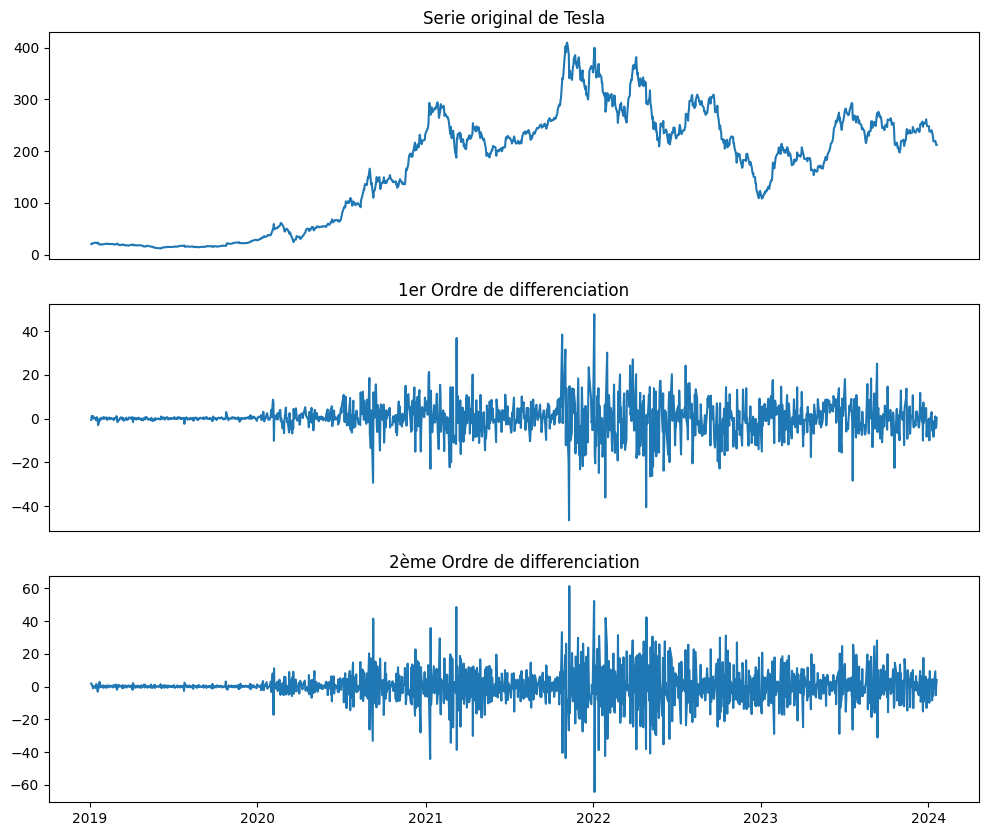

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_figwidth(12)
fig.set_figheight(10)

ax1.plot(tsla_y); ax1.set_title('Serie original de Tesla'); ax1.axes.xaxis.set_visible(False)

ax2.plot(tsla_y.diff()); ax2.set_title('1er Ordre de differenciation'); ax2.axes.xaxis.set_visible(False)

ax3.plot(tsla_y.diff().diff()); ax3.set_title('2ème Ordre de differenciation')
plt.show()

On constate qu'il y'a moins de bruit dans le plot du 1er ordre de differenciation, donc nous allons choisir ce dernier comme valeur de d pour tesla

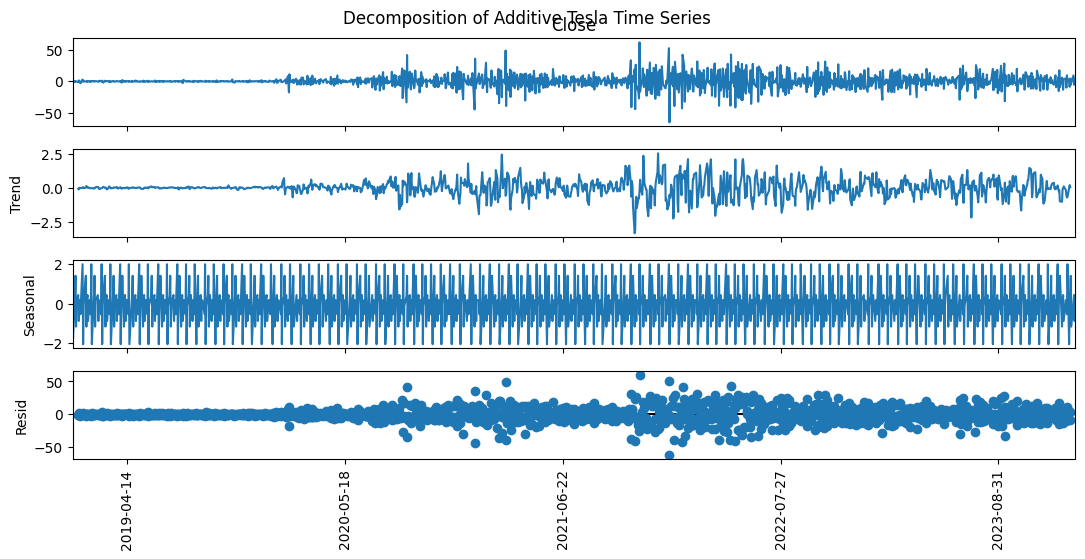

In [ ]:
# Nous allons supprimer la saionalité car le model ARIMA s'attend à des données sans saisonlité.
decompose_seasonal(tsla_y.diff().diff().dropna(), 'Tesla')

Utilisation de Auto-Arima pour trouver p,q et d.

In [ ]:
#!pip install pmdarima

Utilisation de AIC pour trouver p, q, d

In [ ]:
import itertools

In [ ]:
def find_best_pdq_aic(data):

    p = d = q = range(0, 5)
    i = min = 0

    pdq = list(itertools.product(p, d, q))

    for param in pdq:

        try:
            model = ARIMA(data, order = param)
            model_fit = model.fit()


            if i == 0:
                min = model_fit.aic
                i = 1

            print(param, model_fit.aic)

        except:
            continue

In [ ]:
#filterwarnings('ignore', category = UserWarning)
find_best_pdq_aic(tsla_y.values)

In [ ]:
tsla_p = 4
tsla_d = 1
tsla_q = 2

In [ ]:
filterwarnings('ignore', category = UserWarning)
find_best_pdq_aic(mchp_y.values)

In [ ]:
mchp_p = 3
mchp_d = 1
mchp_q = 2

### ARIMA(p,d,q)

In [ ]:
def arima(y, p, q, d):

    """
        Cette fonction créer et fit un modèle ARIMA.
        return: (fit_result, forecasts)
    """

    # Entrainer le modèle sur le training set
    model = ARIMA(y, order = (p, q, d))

    # Fit the model
    results = model.fit()

    print(results.summary())

    print(results.plot_diagnostics(figsize=(16,8)))

    # Forecast
    return (results, results.forecast(steps = len(tsla_y_test)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1271
Model:                 ARIMA(4, 2, 1)   Log Likelihood               -4379.155
Date:                Sun, 11 Feb 2024   AIC                           8770.310
Time:                        22:39:17   BIC                           8801.186
Sample:                             0   HQIC                          8781.909
                               - 1271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0276      0.022     -1.261      0.207      -0.071       0.015
ar.L2          0.0150      0.019      0.781      0.435      -0.023       0.053
ar.L3         -0.0055      0.024     -0.228      0.8

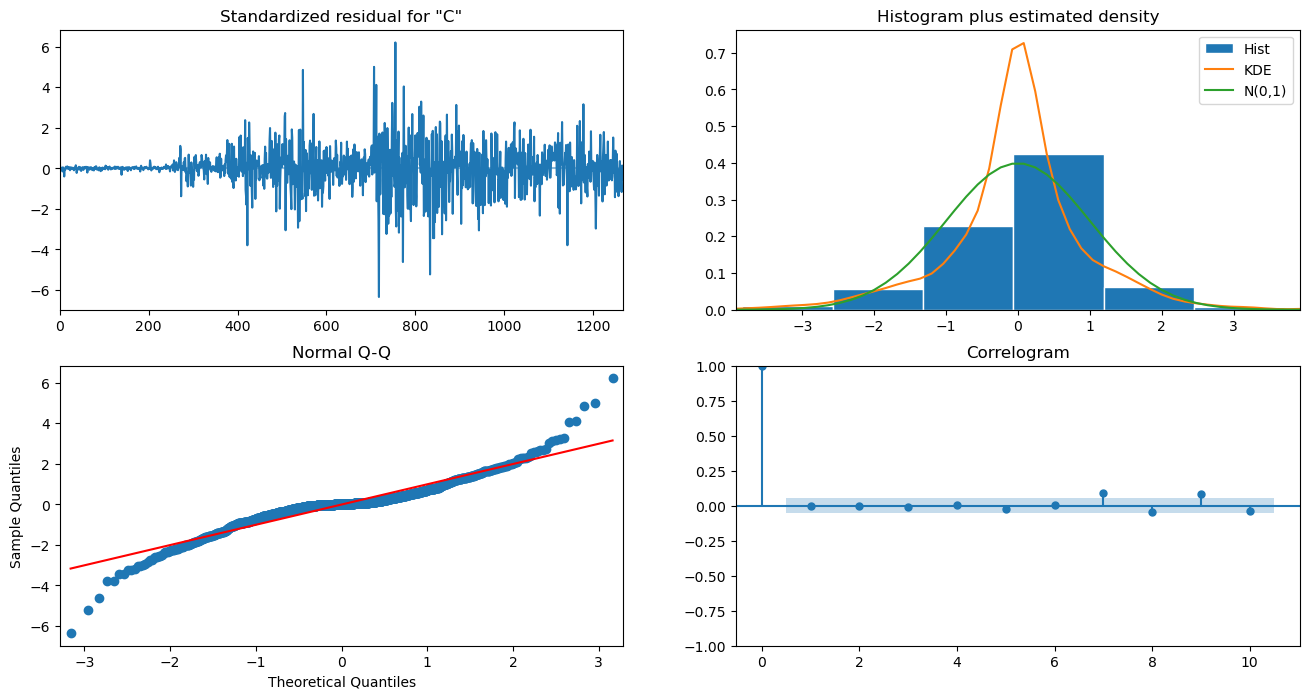

In [ ]:
filterwarnings('ignore', category = UserWarning)
tsla_arima = arima(tsla_y, tsla_p, tsla_q, tsla_d)

In [ ]:
tsla_arima_res = pd.DataFrame()

tsla_arima_res["realite"] = tsla_y_test
tsla_arima_res["prevision"] = tsla_arima[1].values
tsla_arima_res

realite   prevision
Date                              
2022-12-20  137.800003  212.357397
2022-12-21  137.570007  212.250602
2022-12-22  125.349998  212.170274
2022-12-23  123.150002  212.333014
2022-12-27  109.099998  212.482088
...                ...         ...
2024-01-12  218.889999  251.860552
2024-01-16  219.910004  252.010965
2024-01-17  215.550003  252.161377
2024-01-18  211.880005  252.311789
2024-01-19  212.190002  252.462201

[271 rows x 2 columns]

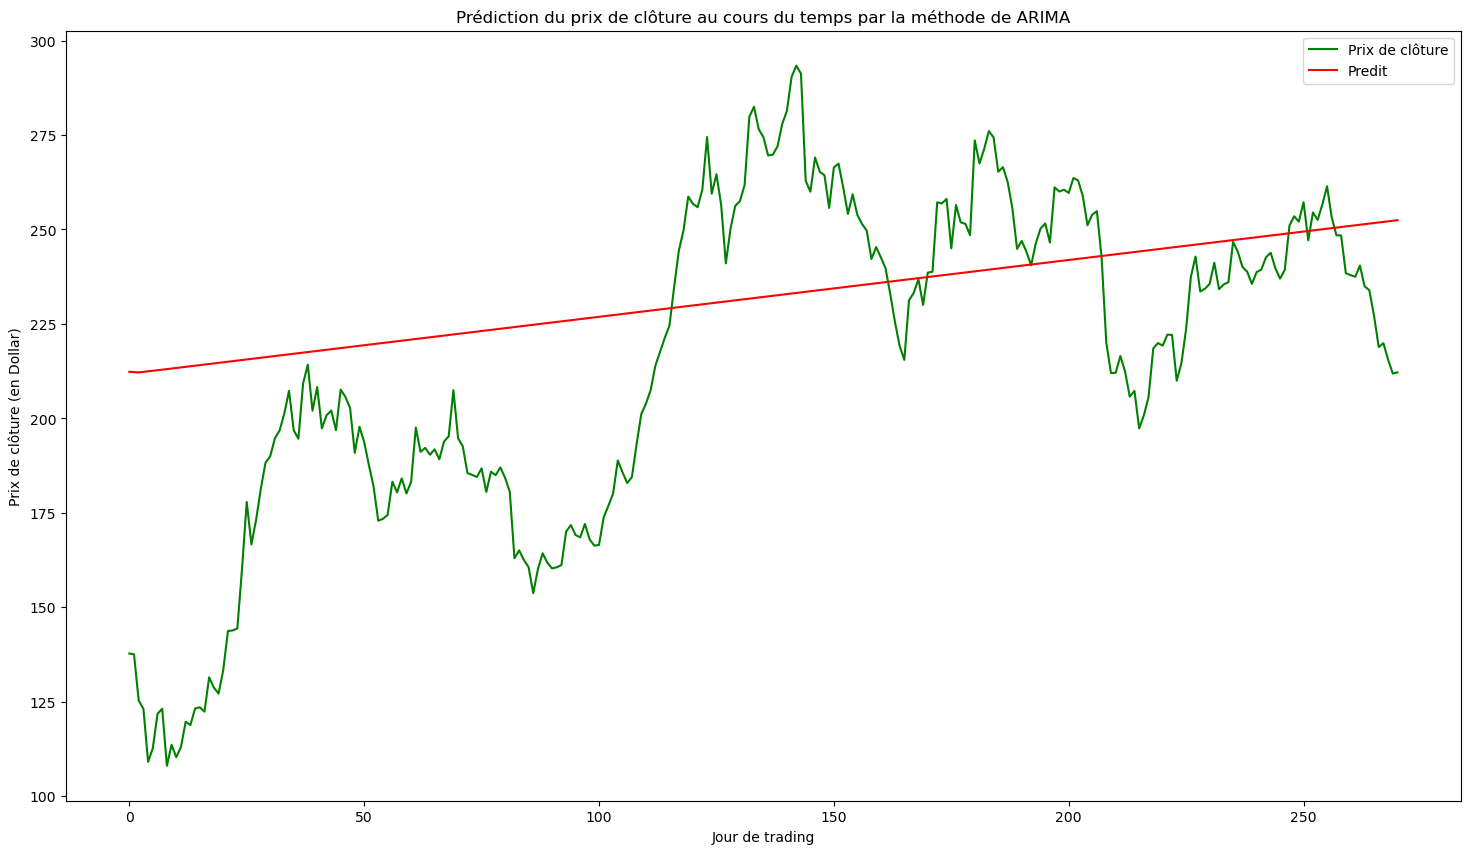

In [ ]:
# Visualisation
plt.figure(figsize = (18, 10))
plt.plot(tsla_y_test.values, label = 'Prix de clôture', color = 'green')
plt.plot(tsla_arima[1].values, label = 'Predit', color = 'red')

plt.ylabel('Prix de clôture (en Dollar)')
plt.xlabel('Jour de trading')
plt.title('Prédiction du prix de clôture au cours du temps par la méthode de ARIMA')
plt.legend(loc = 'best')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1271
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2435.110
Date:                Sun, 11 Feb 2024   AIC                           4880.220
Time:                        22:39:36   BIC                           4905.950
Sample:                             0   HQIC                          4889.885
                               - 1271                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0832      0.025     -3.333      0.001      -0.132      -0.034
ar.L2          0.0257      0.025      1.024      0.306      -0.024       0.075
ar.L3         -0.0068      0.024     -0.282      0.7

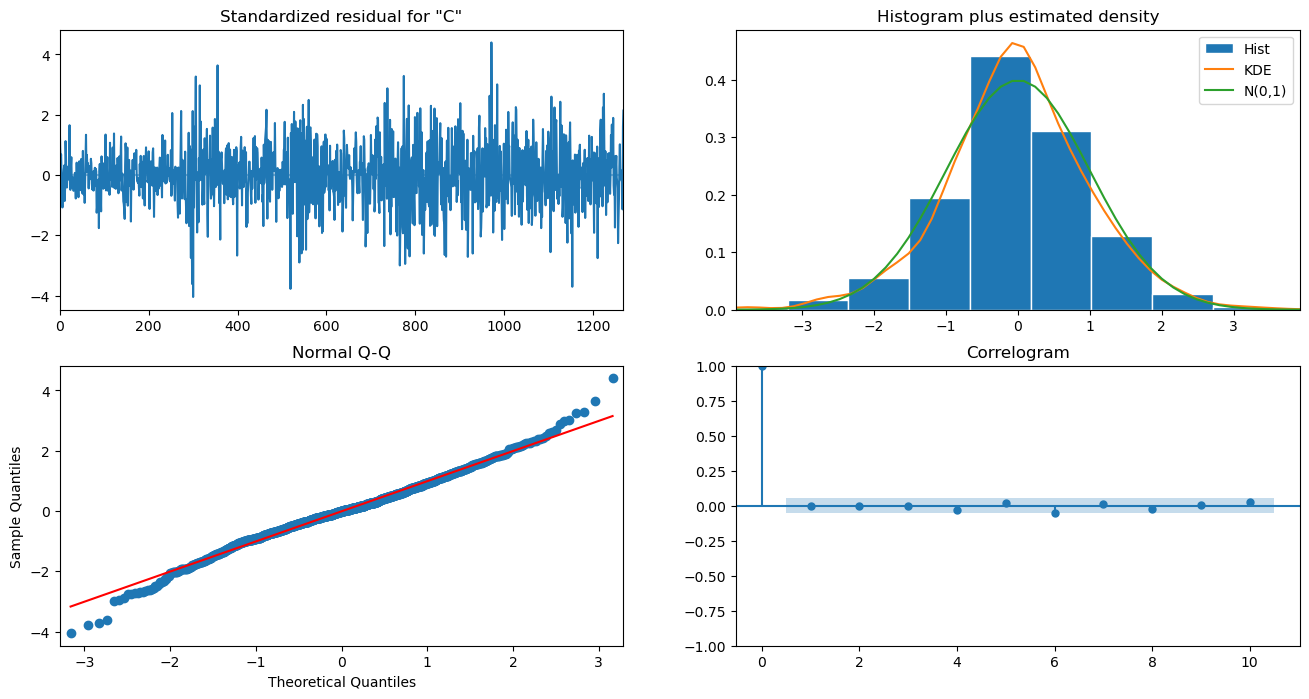

In [ ]:
mchp_arima = arima(mchp_y, mchp_p, mchp_q, mchp_d)

In [ ]:
mchp_arima_res = pd.DataFrame()

mchp_arima_res["realite"] = mchp_y_test
mchp_arima_res["prevision"] = mchp_arima[1].values

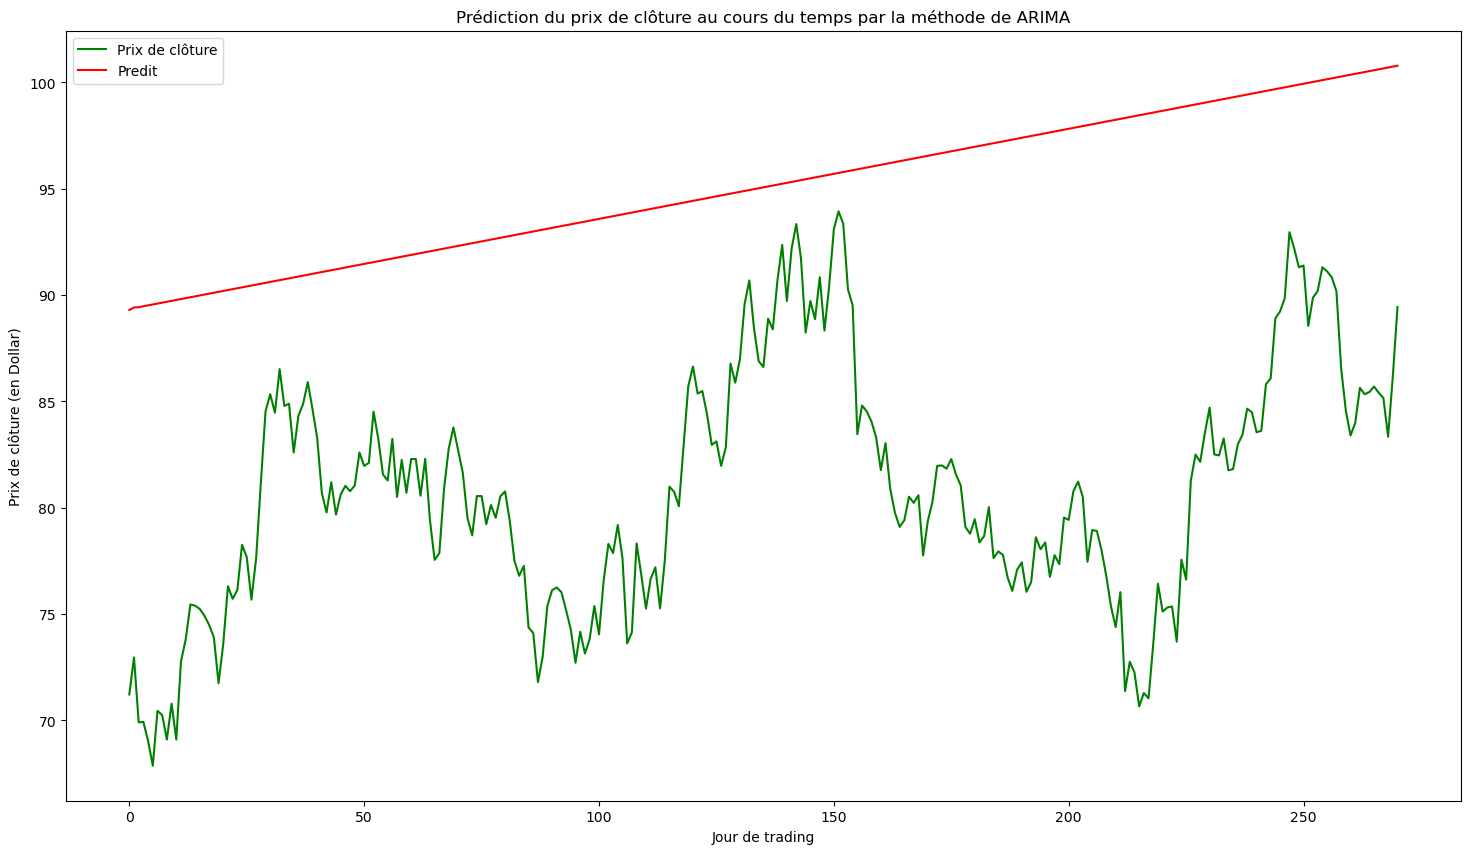

In [ ]:
# Visualisation
plt.figure(figsize = (18, 10))
plt.plot(mchp_y_test.values, label = 'Prix de clôture', color = 'green')
plt.plot(mchp_arima[1].values, label = 'Predit', color = 'red')

plt.ylabel('Prix de clôture (en Dollar)')
plt.xlabel('Jour de trading')
plt.title('Prédiction du prix de clôture au cours du temps par la méthode de ARIMA')
plt.legend(loc = 'best')
plt.show()

Malgré le fait que l'on appliquer la différenciation le modèle n'arrive pas à apprendre sur les données. Passons alors à un modèle capable de prendre en compte la saisonalité comme SARIMA et observons le résultats.

### SARIMA(p,d,q)(P,D,Q)[S]

Trouver les hyperparametres automatiquement

In [ ]:
tsla_auto_arima = pm.auto_arima(tsla_y, start_p = 1, start_q = 1, test = 'adf', max_p = 3, max_q = 3, m = 24,
                       start_P = 0, seasonal = True, d = None, D = 1,
                       trace = True, error_action = 'ignore',
                       suppress_warnings = True, stepwise = True)
tsla_auto_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=19.96 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=12696.151, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=9083.547, Time=11.21 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=11366.328, Time=9.79 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=12708.443, Time=0.20 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=9326.484, Time=0.65 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=8957.120, Time=25.40 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=45.52 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.86 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=12669.022, Time=21.93 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=8959.032, Time=23.79 sec
 ARIMA(1,0,1)(2,1,0)[24] intercept   : AIC=8959.036, Time=30.13 sec
 ARIMA(0,0,1)(2,1,0)[24] intercept   : AIC=11360.458, Time=24.07 sec
 ARIMA(2,0,1)(2,1,0)[24] intercept   : AIC=8961.114, Time=27.00 sec
 ARIMA(1,0,0)(2,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1271
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 24)   Log Likelihood               -4473.709
Date:                            Sun, 11 Feb 2024   AIC                           8955.417
Time:                                    02:23:03   BIC                           8975.931
Sample:                                         0   HQIC                          8963.130
                                           - 1271                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9795      0.004    233.264      0.000       0.971       0.988
ar.S.L24      -0.5584      0.021    -26.783      0.000      -0.599      -0.518
ar.S.L48      -0.3114      0.022    -13.885      0.000      -0.355      -0.267
sigma2        75.7579      1.654     45.797      0.000      72.516      79.000
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1390.19
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               6.43   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mchp_auto_arima = pm.auto_arima(mchp_y, start_p = 1, start_q = 1, test = 'adf', max_p = 3, max_q = 3, m = 24,
                       start_P = 0, seasonal = True, d = None, D = 1,
                       trace = True, error_action = 'ignore',
                       suppress_warnings = True, stepwise = True)
mchp_auto_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=8.28 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=8361.930, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=5275.941, Time=6.92 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=7052.653, Time=4.17 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=8383.618, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=5642.002, Time=0.85 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=5127.015, Time=18.28 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=22.50 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.08 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=8255.005, Time=12.82 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=5121.261, Time=21.17 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=5268.147, Time=7.47 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=32.66 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=14.92 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1271
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 24)   Log Likelihood               -2553.969
Date:                            Sat, 10 Feb 2024   AIC                           5119.939
Time:                                    23:07:36   BIC                           5150.710
Sample:                                         0   HQIC                          5131.508
                                           - 1271                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8939      0.025     36.343      0.000       0.846       0.942
ar.L2          0.1232      0.033      3.764      0.000       0.059       0.187
ar.L3         -0.0488      0.026     -1.855      0.064      -0.100       0.003
ar.S.L24      -0.6774      0.025    -27.607      0.000      -0.725      -0.629
ar.S.L48      -0.3354      0.027    -12.622      0.000      -0.387      -0.283
sigma2         3.4775      0.117     29.601      0.000       3.247       3.708
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                44.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Implémentation du modèle SARIMA avec les paramètres obtenu par auto_arima

In [ ]:

tsla_sarima_model = SARIMAX(tsla_y_train,
                       order=(2, 0, 1),
                       seasonal_order=(2, 1, 0, 24))

In [ ]:
tsla_sarima_fit = tsla_sarima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96108D+00    |proj g|=  1.30944D+01


 This problem is unconstrained.



At iterate    5    f=  3.54843D+00    |proj g|=  3.02038D-02

At iterate   10    f=  3.52445D+00    |proj g|=  3.96931D-03

At iterate   15    f=  3.52402D+00    |proj g|=  6.21412D-03

At iterate   20    f=  3.52391D+00    |proj g|=  4.20691D-04

At iterate   25    f=  3.52322D+00    |proj g|=  4.41881D-03

At iterate   30    f=  3.52240D+00    |proj g|=  1.04122D-02

At iterate   35    f=  3.52044D+00    |proj g|=  1.27664D-02

At iterate   40    f=  3.51990D+00    |proj g|=  2.48766D-03

At iterate   45    f=  3.51971D+00    |proj g|=  2.52942D-04

At iterate   50    f=  3.51970D+00    |proj g|=  5.16211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

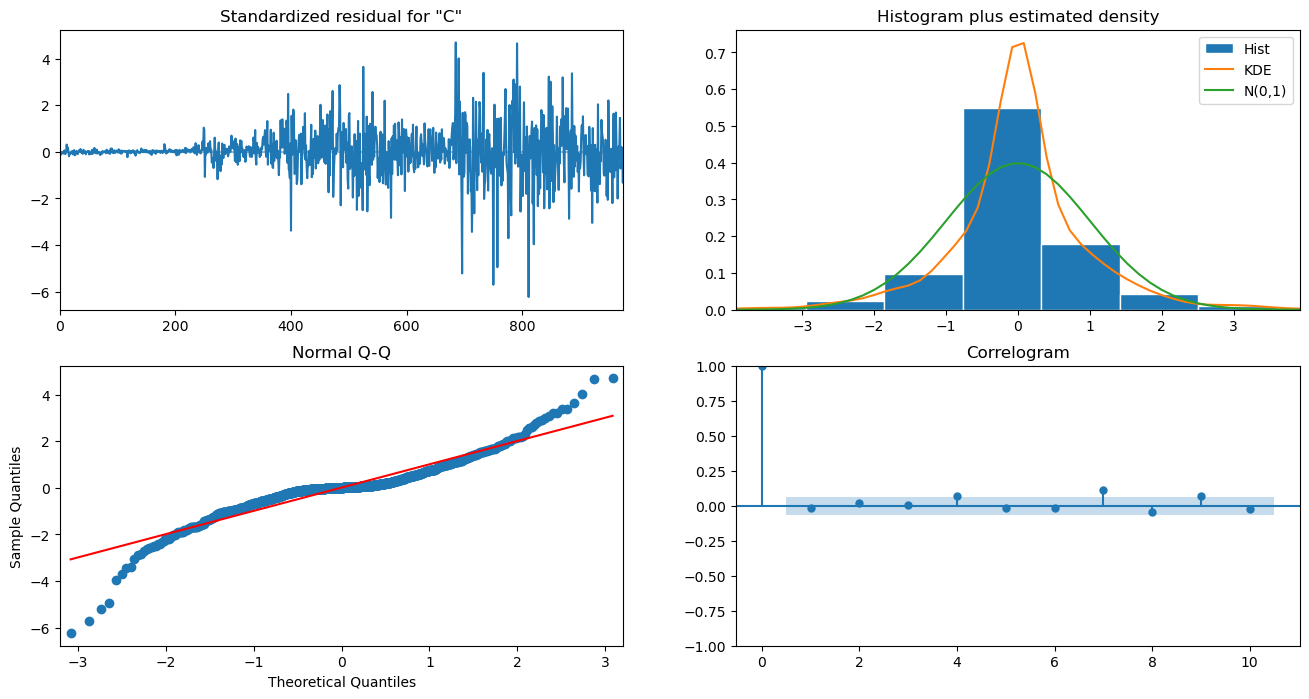

In [ ]:
tsla_sarima_fit.plot_diagnostics(figsize=(16,8));

In [ ]:
tsla_sarima_results = tsla_sarima_fit.forecast(steps = len(tsla_y_test))

In [ ]:
tsla_sarima_results

1000    154.396011
1001    157.034931
1002    153.807715
1003    154.059716
1004    152.546220
           ...    
1266    113.162258
1267    116.328207
1268    112.898092
1269    117.257818
1270    121.525351
Name: predicted_mean, Length: 271, dtype: float64

In [ ]:
tsla_sarima_res = pd.DataFrame()

tsla_sarima_res["realite"] = tsla_y_test
tsla_sarima_res["prevision"] = tsla_sarima_results.values
tsla_sarima_res

realite   prevision
Date                              
2022-12-20  137.800003  154.396011
2022-12-21  137.570007  157.034931
2022-12-22  125.349998  153.807715
2022-12-23  123.150002  154.059716
2022-12-27  109.099998  152.546220
...                ...         ...
2024-01-12  218.889999  113.162258
2024-01-16  219.910004  116.328207
2024-01-17  215.550003  112.898092
2024-01-18  211.880005  117.257818
2024-01-19  212.190002  121.525351

[271 rows x 2 columns]

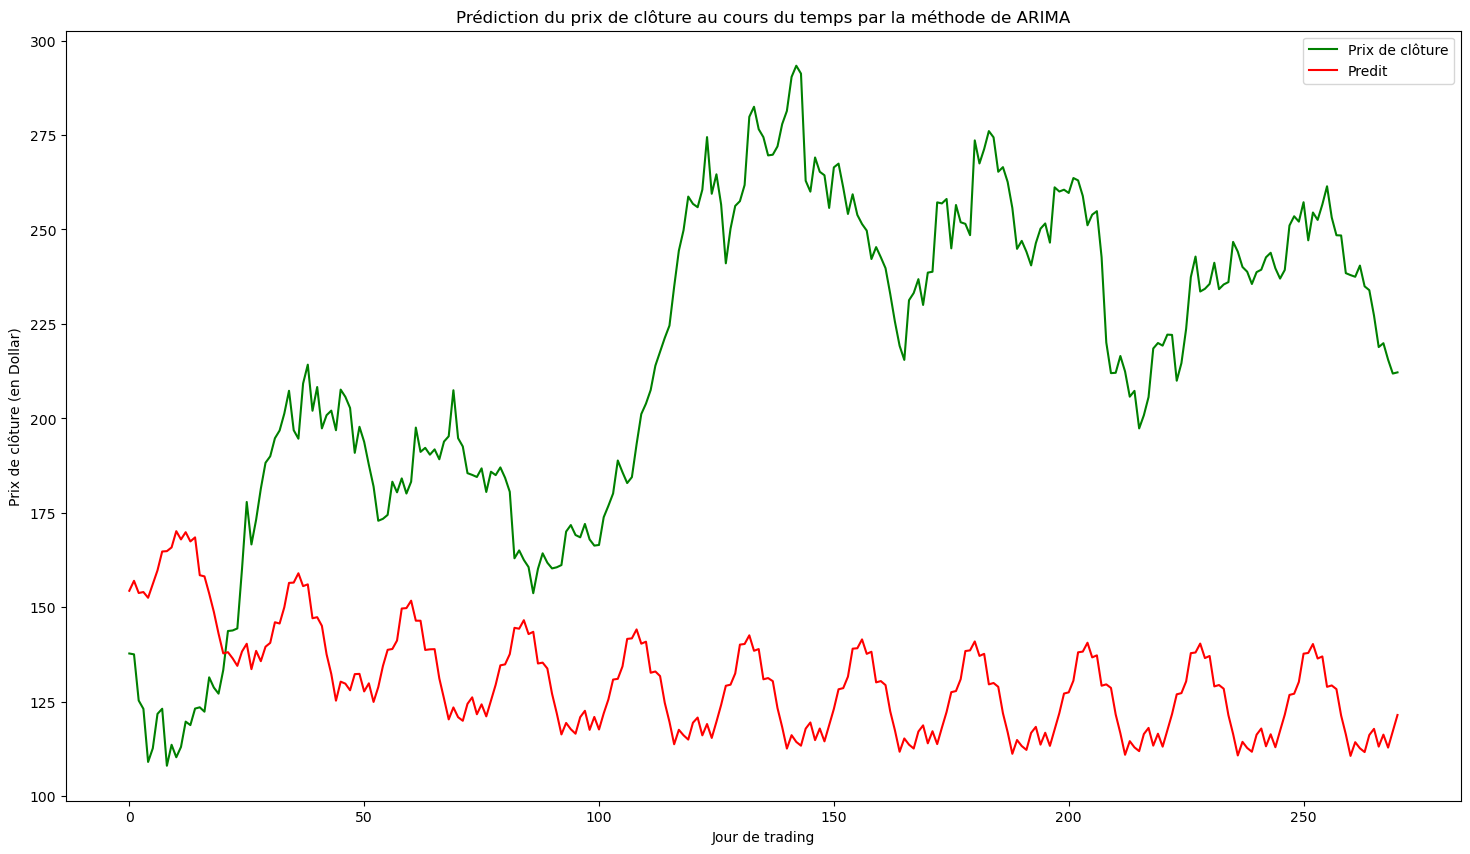

In [ ]:
# Visualisation
plt.figure(figsize = (18, 10))
plt.plot(tsla_y_test.values, label = 'Prix de clôture', color = 'green')
plt.plot(tsla_sarima_results.values, label = 'Predit', color = 'red')

plt.ylabel('Prix de clôture (en Dollar)')
plt.xlabel('Jour de trading')
plt.title('Prédiction du prix de clôture au cours du temps par la méthode de ARIMA')
plt.legend(loc = 'best')
plt.show()

In [ ]:
mchp_sarima_model = SARIMAX(mchp_y_train,
                       order=(3, 0, 0),
                       seasonal_order=(1, 1, 1, 24))

/Users/aliou/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aliou/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
mchp_sarima_fit = mchp_sarima_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07911D+00    |proj g|=  2.21936D-01

At iterate    5    f=  1.94546D+00    |proj g|=  5.61422D-02

At iterate   10    f=  1.91256D+00    |proj g|=  3.10458D-02

At iterate   15    f=  1.90039D+00    |proj g|=  2.35716D-03

At iterate   20    f=  1.89998D+00    |proj g|=  1.72307D-03

At iterate   25    f=  1.89997D+00    |proj g|=  7.16935D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

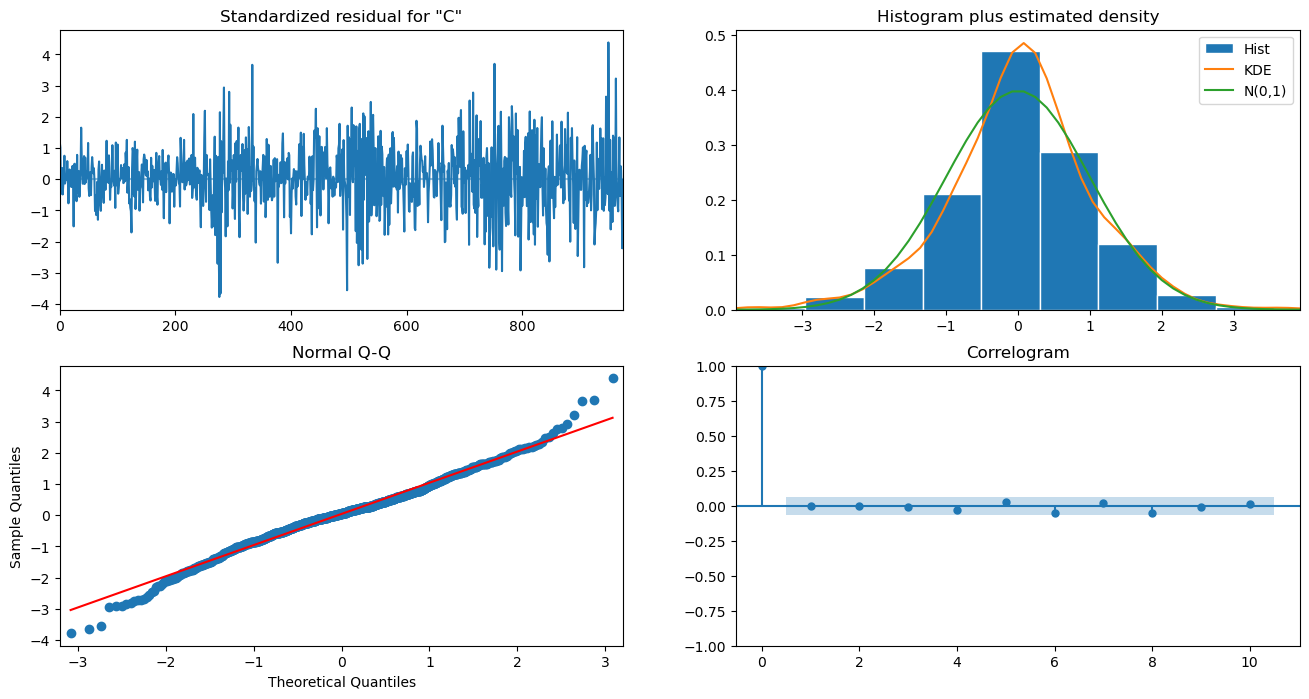

In [ ]:
mchp_sarima_fit.plot_diagnostics(figsize=(16,8));

In [ ]:
mchp_sarima_results = mchp_sarima_fit.forecast(steps = len(mchp_y_test))

/Users/aliou/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aliou/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
mchp_sarima_results

1000    71.426517
1001    70.916736
1002    70.633390
1003    70.863899
1004    71.142964
          ...    
1266    63.355827
1267    63.616567
1268    63.908853
1269    64.412043
1270    64.121884
Name: predicted_mean, Length: 271, dtype: float64

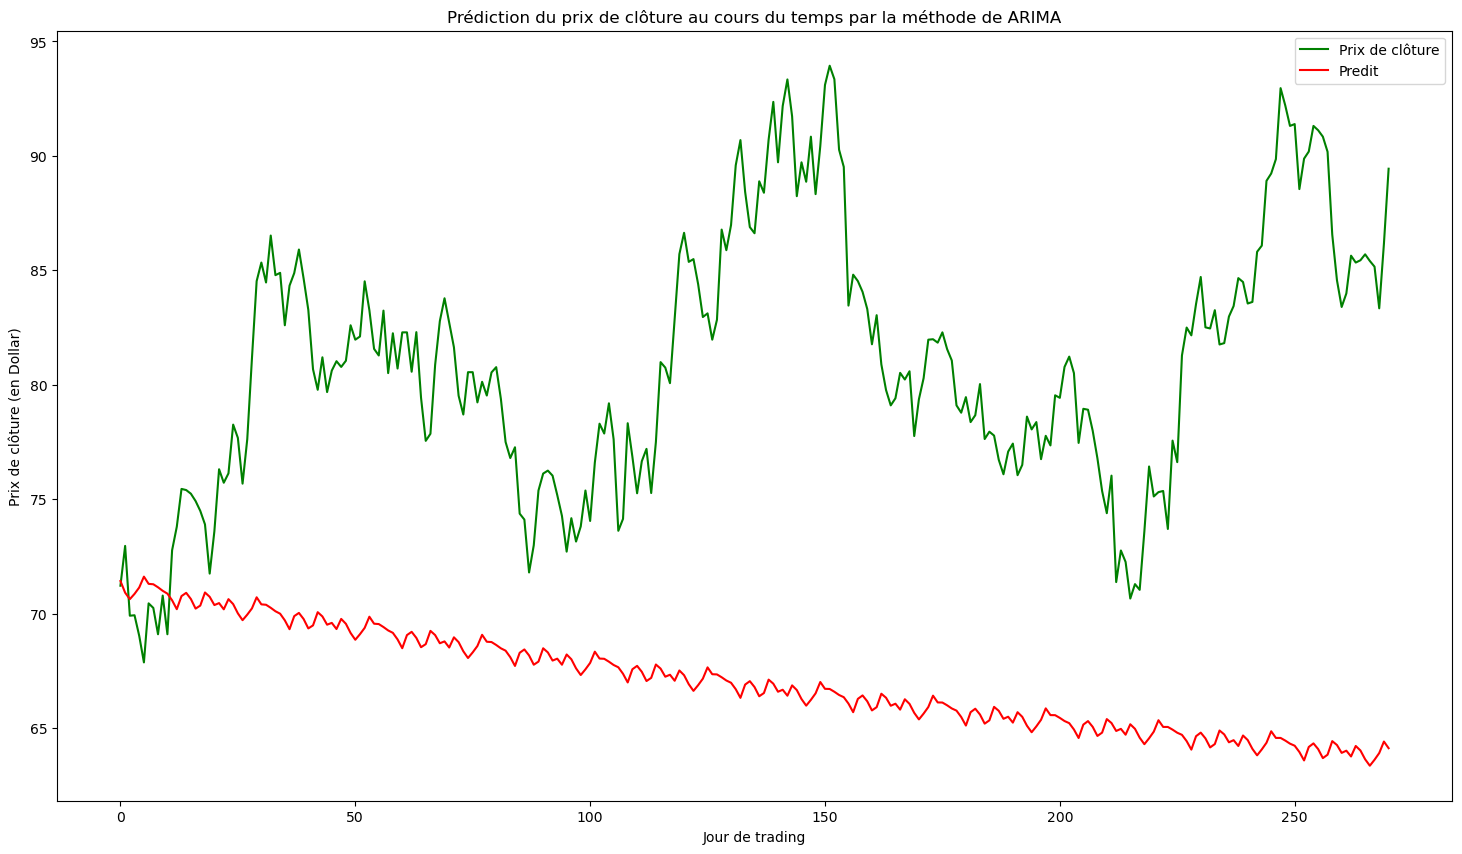

In [ ]:
# Visualisation
plt.figure(figsize = (18, 10))
plt.plot(mchp_y_test.values, label = 'Prix de clôture', color = 'green')
plt.plot(mchp_sarima_results.values, label = 'Predit', color = 'red')

plt.ylabel('Prix de clôture (en Dollar)')
plt.xlabel('Jour de trading')
plt.title('Prédiction du prix de clôture au cours du temps par la méthode de ARIMA')
plt.legend(loc = 'best')
plt.show()

## 6. Les cours des actions de facebook, Amazon, google etc sont elles utiles pour augmenter le pouvoir predictif de nos modeles? Faites des tests de causalité de Granger.

Combinaison des prix de fermeture du marché de Tesla et Microchips

In [ ]:
def adf_test(series):

    result = adfuller(series.values)

    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test = test, verbose = False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)

    for c in df.columns:
        for r in df.index:

            test_result = grangercausalitytests(data[[r, c]], maxlag = maxlag, verbose = False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]

            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value

    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
granger_data = pd.merge(data.TSLA[['Close']], data.MCHP[['Close']],
                        on = 'Date',
                        how = 'right').rename(columns = {'Close_x':'Tesla_close', 'Close_y':'Microchips_close'})

granger_data.head(2)

Tesla_close  Microchips_close
Date                                     
2019-01-02    20.674667         35.674999
2019-01-03    20.024000         33.160000

In [ ]:
print(granger_data.isna().sum(), granger_data.duplicated().sum())

Tesla_close         0
Microchips_close    0
dtype: int64 0


In [ ]:
fig = px.area(granger_data, facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
granger_train, granger_test = granger_data[-1000:], granger_data[0 : -1000]
print(granger_train.shape, granger_test.shape)

(1000, 2) (271, 2)


Nous saonvs que la série n'est pas stationnaire, donc appliquons une différencication pour la rendre stationaire.

In [ ]:
granger_train_differenciated = granger_train.diff().dropna()

fig = px.line(granger_train_differenciated.Tesla_close, facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
fig = px.line(granger_train_differenciated.Microchips_close, facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
print('ADF Test: Tesla time series transformed')
adf_test(granger_train_differenciated.Tesla_close)

print('ADF Test: Microchips time series transformed')
adf_test(granger_train_differenciated.Microchips_close)

ADF Test: Tesla time series transformed
ADF Statistics: -9.149724
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
ADF Test: Microchips time series transformed
ADF Statistics: -34.572952
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Au vue de la valeur très négligeable de p-valeur on conclu que la série est maintenant stationaire.

Sélection d'un ordre de lag (Nous prendrons le lag avec le plus petit AIC).

In [ ]:
var_model = VAR(granger_train_differenciated)

lag_min = 0
occ = 0

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:

    result = var_model.fit(i)

    if occ == 0:
        occ += 1
        lag_min = result.aic

    if result.aic <= lag_min:
        lag_min = result.aic
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  5.23701797415481
BIC :  5.266511480826021
FPE :  188.1083281359644
HQIC:  5.2482286539825385 



/Users/aliou/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Le plus petit ordre de lag est le premier lag.

In [ ]:
var_model_results = var_model.fit(maxlags = 15, ic = 'aic')
var_model_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 11, Feb, 2024
Time:                     21:45:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.26651
Nobs:                     998.000    HQIC:                   5.24823
Log likelihood:          -5439.47    FPE:                    188.108
AIC:                      5.23702    Det(Omega_mle):         186.982
--------------------------------------------------------------------
Results for equation Tesla_close
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.171798         0.272278            0.631           0.528
L1.Tesla_close             -0.041849         0.035614           -1.175           0.240
L1.Microchips_close         0.

- On remarque depuis la matrice de corrélation que la corrélation entre les valeurs de fermeture du marché de Tesla et Microchips est de 0.45.

-- Détectons l'autocorrelation avec un test de Durbin-Watson

In [ ]:
out = durbin_watson(var_model_results.resid)

for col, val in zip(granger_data.columns, out):
    print(col, ':', round(val, 2))

Tesla_close : 2.0
Microchips_close : 1.99


- Une valeur de 2.0 signifie qu'il n'y a pas d'autocorrelation pour Tesla.

- Une valuer de 1.99 signifie qu'il y'a une autocorrelation néanmoins négligeable par contre.

-- Effectuons le test de Granger.

In [ ]:
filterwarnings('ignore', category = FutureWarning)
grangers_causation_matrix(granger_train_differenciated, variables = granger_train_differenciated.columns)

Tesla_close_x  Microchips_close_x
Tesla_close_y               1.000              0.4611
Microchips_close_y          0.348              1.0000

- D'après le test de Granger on peut conclure que les actions de Tesla et Microchip ne causent pas.

- Donc Microchips n'augmentera pas le pouvoir prédictif de nos modèles.

- D'aurenavent nous allons nous concentrer sur les actions de tesla Uniquement.

## 7. Entraînez de nouveau un modèle SARIMAX(p,q,d)(P,Q,D,S) avec les données explicatives que vous trouvez importantes

In [ ]:
df = data.TSLA.iloc[:, 0 : 4]
df.head(1)

Price            Open       High    Low      Close
Date                                              
2019-01-02  20.406668  21.008667  19.92  20.674667

In [ ]:
fig = px.area(df)
fig.show()

Nous savons déjà que la variable Close:

 - Ne suit pas la loi normale.

 - N'est pas stationaire.

In [ ]:
grangers_causation_matrix(data.TSLA, variables = data.TSLA.columns)

Open_x  High_x   Low_x  Close_x  Adj Close_x  Volume_x
Open_y       1.0000  0.0000  0.0000      0.0          0.0    0.4937
High_y       0.0000  1.0000  0.0000      0.0          0.0    0.0025
Low_y        0.0000  0.0000  1.0000      0.0          0.0    0.0045
Close_y      0.0004  0.0004  0.0002      1.0          1.0    0.3739
Adj Close_y  0.0004  0.0004  0.0002      1.0          1.0    0.3739
Volume_y     0.0000  0.0000  0.0000      0.0          0.0    1.0000

D'après le test de Granger, vue que les p-valeurs sont strictements inférieurs à 0.05, les valeur explicatives potentiels sont:

 - Open

 - High

 - Low

In [ ]:
variable_exogenes = df.iloc[:, : 3]
variable_exogenes.head(2)

Price            Open       High        Low
Date                                       
2019-01-02  20.406668  21.008667  19.920000
2019-01-03  20.466667  20.626667  19.825333

In [ ]:
target = df.iloc[:, -1]
target.head()

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
Name: Close, dtype: float64

In [ ]:
target_train, target_test = target[-1000:], target[0 : -1000]
print(target_train.shape, target_test.shape)

(1000,) (271,)


In [ ]:
variable_exogenes_train, variable_exogenes_test = variable_exogenes[-1000:], variable_exogenes[0 : -1000]
print(variable_exogenes_train.shape, variable_exogenes_test.shape)

(1000, 3) (271, 3)


Entrainement du model SARIMAX

In [ ]:
#Paramètres de SARIMA(p=2,d=0,q=1)(P=2,D=1,Q=0)[s=24]

# define model configuration
my_order = (2, 0, 1)
my_seasonal_order = (2, 1, 0, 24)

# define model
sarimax_model = SARIMAX(target_train, exog = variable_exogenes_train, order = my_order, seasonal_order = my_seasonal_order)

In [ ]:
#Fit et analyse des résultats.
sarimax_results = sarimax_model.fit(disp=True)
sarimax_results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94473D+00    |proj g|=  5.28928D+01

At iterate    1    f=  2.72061D+00    |proj g|=  1.96198D-01

At iterate    2    f=  2.72059D+00    |proj g|=  1.96141D-01

At iterate    3    f=  2.72037D+00    |proj g|=  1.00659D+00

At iterate    4    f=  2.71992D+00    |proj g|=  2.08212D+00

At iterate    5    f=  2.71864D+00    |proj g|=  3.91003D+00

At iterate    6    f=  2.71558D+00    |proj g|=  6.26013D+00

At iterate    7    f=  2.70884D+00    |proj g|=  8.41360D+00

At iterate    8    f=  2.69940D+00    |proj g|=  8.36106D+00

At iterate    9    f=  2.68644D+00    |proj g|=  4.72135D+00

At iterate   10    f=  2.68012D+00    |proj g|=  1.30617D+00

At iterate   11    f=  2.67911D+00    |proj g|=  4.53471D-01

At iterate   12    f=  2.67906D+00    |proj g|=  6.86160D-01

At iterate   13    f=  2.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1000
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 24)   Log Likelihood               -2641.686
Date:                             Sun, 11 Feb 2024   AIC                           5301.371
Time:                                     22:55:01   BIC                           5345.322
Sample:                                          0   HQIC                          5318.095
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6729      0.018    -37.798      0.000      -0.708      -0.638
High           0.8657      0.018     48.047      0.000       0.830       0.901
Low            0.8067      0.014     57.967      0.000       0.779       0.834
ar.L1          0.8196      0.025     33.041      0.000       0.771       0.868
ar.L2          0.1291      0.024      5.281      0.000       0.081       0.177
ma.L1         -0.9943      0.003   -289.085      0.000      -1.001      -0.988
ar.S.L24      -0.6250      0.026    -24.483      0.000      -0.675      -0.575
ar.S.L48      -0.2895      0.027    -10.903      0.000      -0.342      -0.237
sigma2        12.4399      0.391     31.841      0.000      11.674      13.206
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):               211.10
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.16
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

-- Plotter les diagnostics

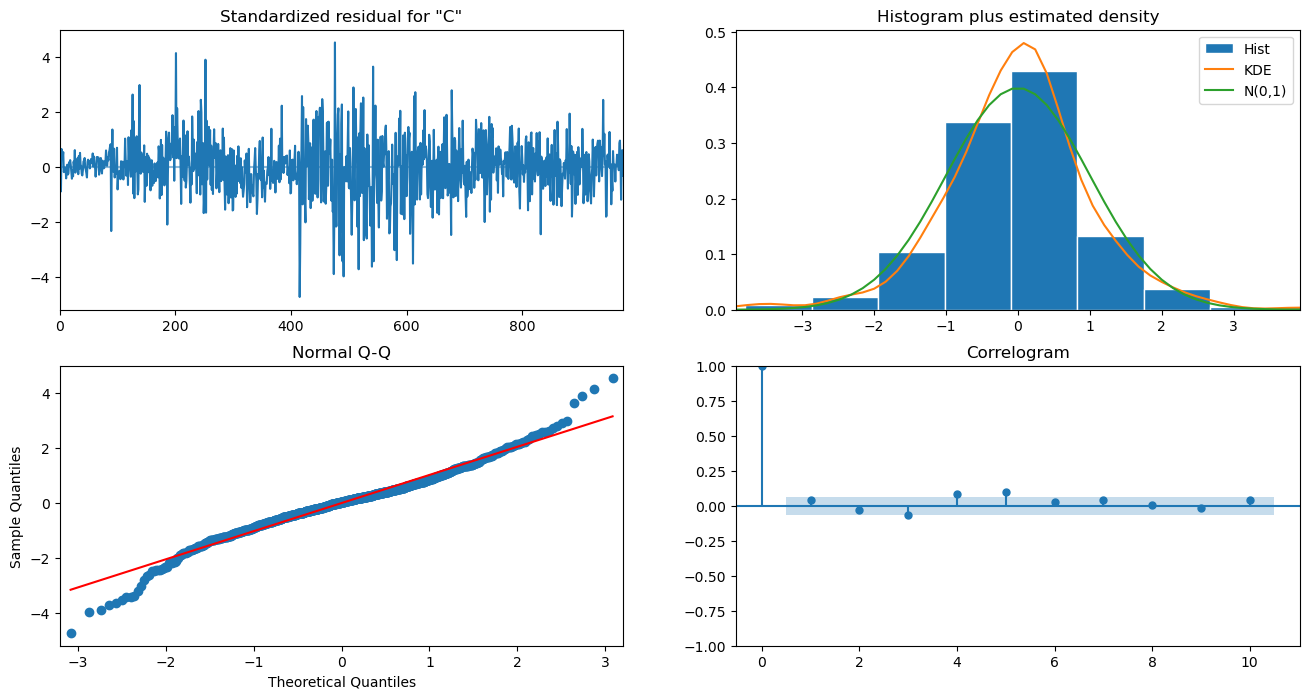

In [ ]:
sarimax_results.plot_diagnostics(figsize=(16,8));

-- Prédictions

In [ ]:
variable_exogenes_test.head(1)

Open       High    Low
Date                                   
2019-01-02  20.406668  21.008667  19.92

In [ ]:
variable_exogenes_test.shape

(271, 3)

In [ ]:
sarimax_predictions = sarimax_results.forecast(steps = 271, start_index = "2019-01-02", exog = variable_exogenes_test)

In [ ]:
sarimax_predictions

1000    21.039389
1001    22.495932
1002    19.242624
1003    22.813280
1004    19.831770
          ...    
1266    36.417533
1267    38.178627
1268    34.500063
1269    39.003112
1270    38.907648
Name: predicted_mean, Length: 271, dtype: float64

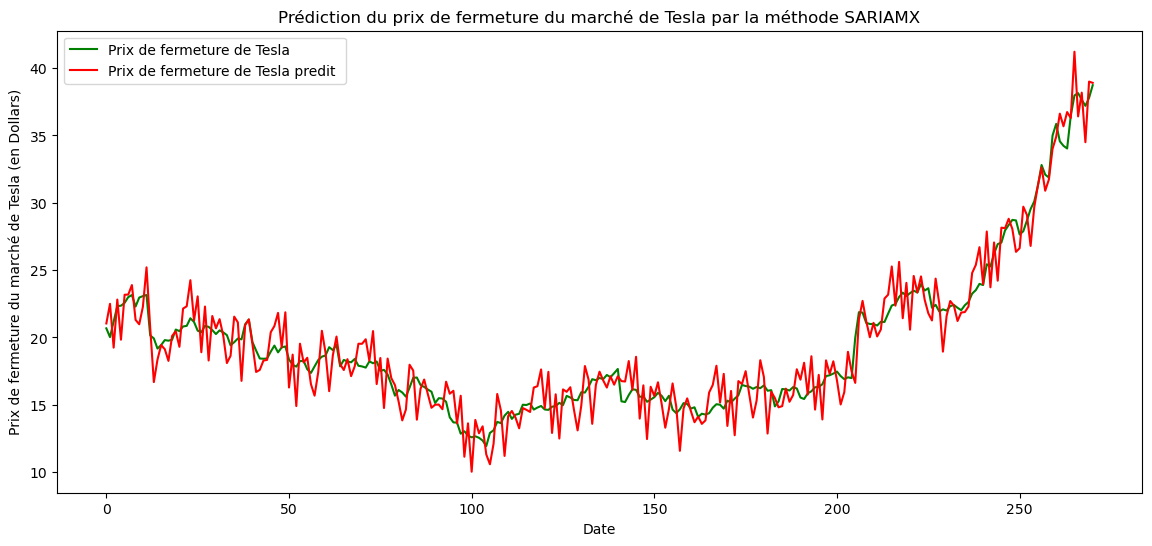

In [ ]:
plt.figure(figsize = (14, 6))
plt.plot(target_test.values, label='Prix de fermeture de Tesla', color = 'green')

plt.plot(sarimax_predictions.values, label='Prix de fermeture de Tesla predit ', color = 'red')

plt.ylabel('Prix de fermeture du marché de Tesla (en Dollars)')
plt.xlabel('Date')
plt.title('Prédiction du prix de fermeture du marché de Tesla par la méthode SARIAMX')
plt.legend(loc = 'best')
plt.show()

Le modèle SARIMAX nous donne clairement les meilleurs résultats parmis tous les modèles  et de loin. On voir que le modèle à pu bien s'entrainer avec les données d'entrainement.

## 8. Familiarisez-vous avec FACEBOOK NEURALPROPHET et créez un modèle

In [ ]:
df_train, df_test = df[0 : 1000], df[1000 :]
print(df_train.shape, df_test.shape)

(1000, 4) (271, 4)


In [ ]:
df_test.reset_index(inplace=True)

In [ ]:
# Rename columns to 'ds' and 'y'
df_test.rename(columns={'Date':'ds', 'Close': 'y'}, inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-27-6da0c879aed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'Date':'ds', 'Close': 'y'}, inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'Date':'ds', 'Close': 'y'}, inplace=True)



In [ ]:
df_test.head(1)

Price         ds        Open        High         Low           y
0     2022-12-20  146.050003  148.470001  137.660004  137.800003

In [ ]:
df_test_target = df_test[['ds', 'y']]

In [ ]:
df_test_target.head(1)

Price         ds           y
0     2022-12-20  137.800003

In [ ]:
# Initialize and train the NeuralProphet model
nprophet_model = NeuralProphet()

In [ ]:
nprophet_model.fit(df_test_target, freq = 'D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.834% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.834% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  c

Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE        RMSE      Loss  RegLoss  epoch
0    114.859550  137.089584  0.482905      0.0      0
1    108.811234  129.630188  0.448269      0.0      1
2    103.242477  122.605865  0.415991      0.0      2
3     99.788048  118.535225  0.398774      0.0      3
4     96.612762  113.943146  0.378109      0.0      4
..          ...         ...       ...      ...    ...
311   14.868199   17.745663  0.014388      0.0    311
312   14.714025   17.617426  0.014166      0.0    312
313   14.639650   17.518530  0.013982      0.0    313
314   14.602749   17.546011  0.014121      0.0    314
315   14.642668   17.580471  0.014003      0.0    315

[316 rows x 5 columns]

In [ ]:
# Make future predictions
future = nprophet_model.make_future_dataframe(df_test_target, periods = 24)  # Predicting next 30 days
forecast = nprophet_model.predict(future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.834% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.834% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
# Print forecast
print(forecast[['ds', 'yhat1']])  # Print forecasted dates and predicted closing prices for the next 30 days

           ds       yhat1
0  2024-01-20  371.652588
1  2024-01-21  235.095413
2  2024-01-22  233.819702
3  2024-01-23  235.079575
4  2024-01-24  234.074066
5  2024-01-25  232.738525
6  2024-01-26  232.395691
7  2024-01-27  371.209473
8  2024-01-28  234.616425
9  2024-01-29  233.438980
10 2024-01-30  234.473511
11 2024-01-31  233.558655
12 2024-02-01  232.359039
13 2024-02-02  231.923798
14 2024-02-03  370.764923
15 2024-02-04  234.137604
16 2024-02-05  232.938171
17 2024-02-06  234.104492
18 2024-02-07  233.043274
19 2024-02-08  231.974289
20 2024-02-09  231.581833
21 2024-02-10  370.326294
22 2024-02-11  233.726059
23 2024-02-12  232.437286


In [ ]:
nprophet_test_preds_data = yf.download("TSLA", start="2024-01-20", end="2024-02-12")
nprophet_test_preds_data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-22  212.259995  217.800003  206.270004  208.800003  208.800003   
2024-01-23  211.300003  215.649994  207.750000  209.139999  209.139999   
2024-01-24  211.880005  212.729996  206.770004  207.830002  207.830002   
2024-01-25  189.699997  193.000000  180.059998  182.630005  182.630005   
2024-01-26  185.500000  186.779999  182.100006  183.250000  183.250000   

               Volume  
Date                   
2024-01-22  117952500  
2024-01-23  106605900  
2024-01-24  123369900  
2024-01-25  198076800  
2024-01-26  107343200

In [ ]:
nprophet_test_preds_data.shape

(15, 6)

In [ ]:
forecast.shape

(24, 5)

In [ ]:
forecast.rename(columns={'ds':'Date'}, inplace=True)

In [ ]:
forecast.set_index('Date', inplace = True)

In [ ]:
forecast.head(1)

y       yhat1       trend  season_weekly
Date                                                   
2024-01-20  None  371.652588  253.712128     117.940445

In [ ]:
nprophet_merged_df = pd.merge(nprophet_test_preds_data.Close, forecast.yhat1,
                        on = 'Date',
                        how = 'right')

In [ ]:
nprophet_merged_cleaned = nprophet_merged_df[nprophet_merged_df.Close.isna() == False]
nprophet_merged_cleaned.isna().sum()

Close    0
yhat1    0
dtype: int64

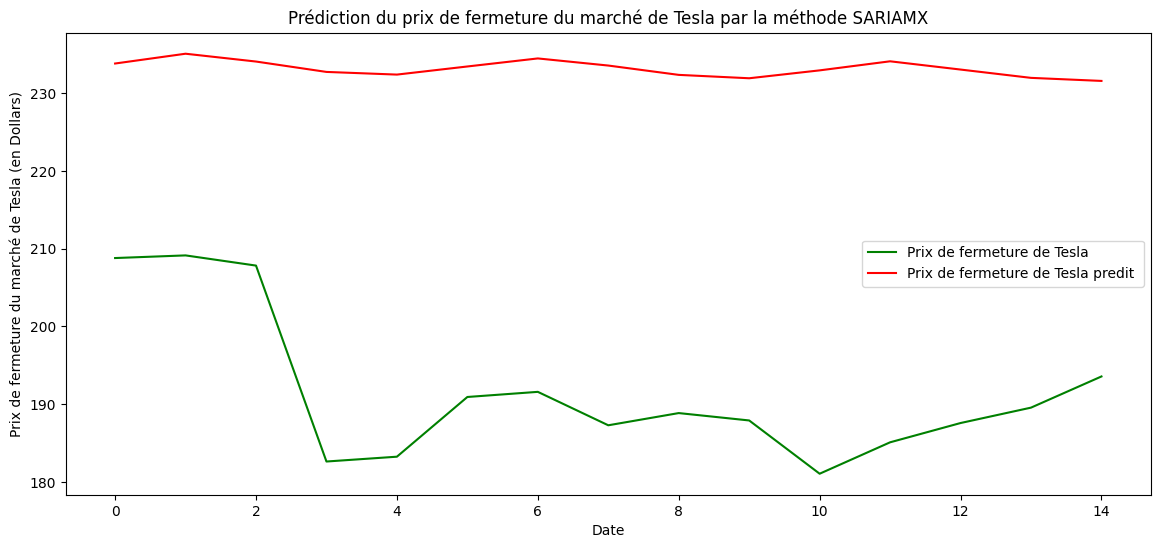

In [ ]:
plt.figure(figsize = (14, 6))
plt.plot(nprophet_merged_cleaned.Close.values, label='Prix de fermeture de Tesla', color = 'green')

plt.plot(nprophet_merged_cleaned.yhat1.values, label='Prix de fermeture de Tesla predit ', color = 'red')

plt.ylabel('Prix de fermeture du marché de Tesla (en Dollars)')
plt.xlabel('Date')
plt.title('Prédiction du prix de fermeture du marché de Tesla par la méthode SARIAMX')
plt.legend(loc = 'best')
plt.show()

# PARTIE C

## 9. Modèle avec LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from array import array

In [ ]:
df.shape

(1271, 4)

In [ ]:
# split a univariate data
def split_sequence(donnee, n_steps):
    X, y = list(), list()

    for i in range(len(donnee)):

        # find the end of this pattern
        end_ix = i + n_steps

        # break if we are beyond the dataset
        if end_ix > len(donnee)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = donnee[i:end_ix], donnee[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    print(len(X), len(y))
    return np.array(X), np.array(y)  # Use np.array() to convert lists to arrays

In [ ]:
# define input sequence
raw_seq = df.values

# choose a number of time steps
n_steps = 4

# split into samples
X, y = split_sequence(raw_seq, n_steps)

1267 1267


In [ ]:
X.shape

(1267, 4, 4)

In [ ]:
# Splitting data into input and output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(953, 3)

In [ ]:
n_features = 4
# Building the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(units = 50, return_sequences=False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
model.fit(X[0 : 1000], y[ 0 : 1000], epochs = 100, verbose = 0)

In [ ]:
# Evaluating the model
model.evaluate(X[1000 : ], y[1000 : ])

9/9 [==============================] - 0s 2ms/step - loss: 45.9749


45.97492218017578

In [ ]:
yhat = model.predict(X[1000 : ], verbose = 0)

In [ ]:
df_ghost = df.reset_index()
df_ghost.head(2)

Price       Date       Open       High        Low      Close
0     2019-01-02  20.406668  21.008667  19.920000  20.674667
1     2019-01-03  20.466667  20.626667  19.825333  20.024000

In [ ]:
y_combined = pd.DataFrame({
    'Date': df_ghost.Date.iloc[1004:],  # Reset index to align with y and yhat
    'y': df_ghost.Close.iloc[1004:],  # Flatten y to ensure it's 1D
    'yhat': yhat.flatten()  # Flatten yhat to ensure it's 1D
})

In [ ]:
y_combined.head()

Date           y        yhat
1004 2022-12-27  109.099998  126.485558
1005 2022-12-28  112.709999  109.737740
1006 2022-12-29  121.820000  112.791214
1007 2022-12-30  123.180000  123.063026
1008 2023-01-03  108.099998  121.711678

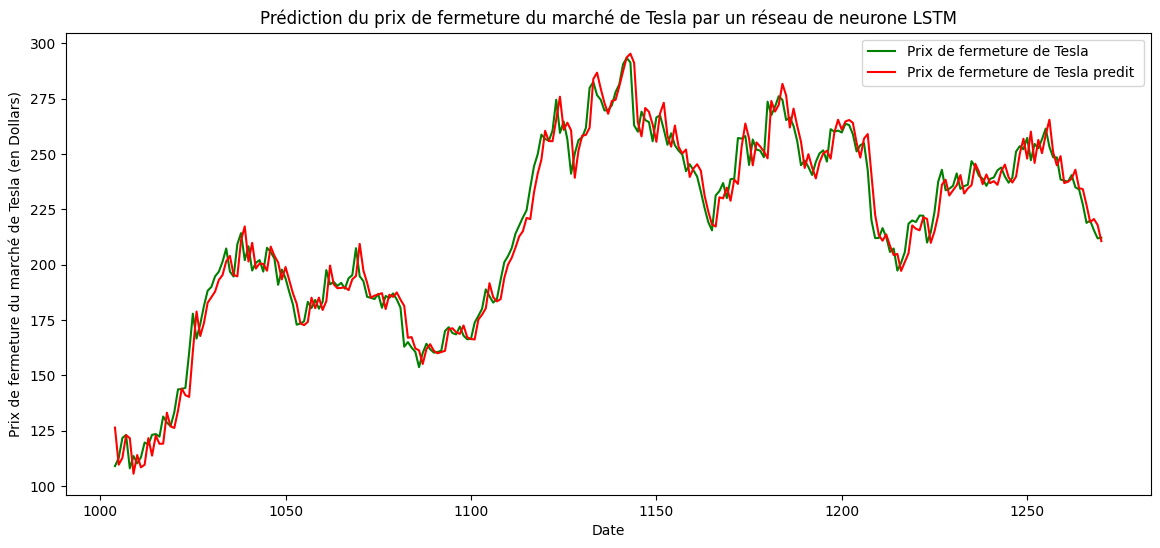

In [ ]:
plt.figure(figsize = (14, 6))
plt.plot(y_combined.y, label='Prix de fermeture de Tesla', color = 'green')

plt.plot(y_combined.yhat, label='Prix de fermeture de Tesla predit ', color = 'red')

plt.ylabel('Prix de fermeture du marché de Tesla (en Dollars)')
plt.xlabel('Date')
plt.title('Prédiction du prix de fermeture du marché de Tesla par un réseau de neurone LSTM')
plt.legend(loc = 'best')
plt.show()

## 10. Comparez vos modules

Résumé des modèles:

 - ExponentialSmoothing: Ce modèle n'arrivait pas à apprendre éfficacement sur le mouvement des prix de clôture du marché.

 - AR(3) et MA(3): Ces deux modèles n'ont pas pu apprendre sur nos données non stationnaires.

 - ARIMA(p,d,q): Malgré l'intégration par le modèle du fait que les données ne sont pas stationnaire, le modèle n'a pas du tout pu apprendre sur les données.

 - SARIMA(p,d,q)(P,D,Q)[S]: Avec le modèle SARIMA on capte mieux les spécificités des données, mais l’apprentissage reste faible et donc non conséquent.

 - SARIMAX(p,d,q)(P,D,Q,S): Avec SARIMAX on prend en compte toutes les valeurs exogènes (Trouver par un test de Granger) et cela nous permet un meilleur apprentissage, et donc le modèle bien que pas très précis, capte la subtilité des données.

 - NEURALPROPHET: Avec NEURALPROPHET nous avons un modèle presque comme ARIMA, il n'arrive pas a apprendre sur les données.

 - LSTM(Long short-term memory): Avec un réseau de neurones LSTM on obtient un modèle qui apprend bien sur les données et qui donne des résultats prochent de la perfection.

 - Conclusion: Le LSTM est le modèle qui arrive à mieux apprendre sur les données du marché de Tesla et à donner de très bon resultats.